<center><img src='intro.png' width="1100" height="1100" align="center"><center>



<center><img src='intro2.png' width="1100" height="1100" align="center"><center>



<center><img src='definitions2.png' width="1100" height="1100" align="center"><center>



## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import math
from collections import Counter



import sklearn.preprocessing as sp
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from subprocess import check_output


from dython.nominal import identify_nominal_columns
import warnings
warnings.filterwarnings('ignore')

## Open file and initial exploration/ transformation


In [2]:
filename =r'../_Project2_/datasets/barcelona.csv'

In [3]:
df_1 = pd.read_csv(filename)
df_raw= df_1.copy()

In [4]:
#print("There are ",len(df_1.columns), " columns in the original dataset.\n"" -We will drop those variables that are not needed for the analysis-")

In [5]:
pd.set_option('display.max_columns', 134)
pd.DataFrame(df_1.columns).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,...,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134
0,ID,METODE,DATA,Codi_Districte,Nom_Districte,F0,F1,F2,RENDA,Q1,Q2,EDAT,ID4,ID4_PAIS,ID5,P9,ID7,ID8,ID9,P1,P1A,Q1A,P1B,P2_1,P2_2,P2_3,P2_4,P2_6,P2_7,P2_5,P2_5B,P2,P2A,P2B,P3_1,P3_2,P3_3,P3_0,P3_95,P3_98,P3_99,P4,P5A_1,P5A_2,P5A_3,P5A_4,P5A_5,P5A_6,P5A_7,P5A_8,P5A_9,P5A_10,P5A_11,P5A_12,P5A_13,P5A_14,P5A_15,P5A_16,P5A_17,P5A_18,P5A_19,P5A_20,P5A_18_cod,P6,P7,Q8,P8B,...,P10,P10B_1,P10B_2,P10B_3,P10B_4,P10B_5,P10B_6,P10B_95,P10B_98,P10B_99,P11_0,P11_1,P11_2,P11_3,P11_4,P11_5,P11_98,P11_99,P11B,P11C_1,P11C_2,P11C_3,P11C_4,P11C_5,P11C_6,P11C_95,P11C_98,P11C_99,P12,Q12,P13,P13B_1,P13B_2,P13B_3,P13B_4,P13B_5,P13B_98,P13B_99,ID10,ID11,P14,P14_1cod,P14_2cod,P5A_1rec,P5A_2rec,P5A_3rec,P5A_4rec,P5A_5rec,P5A_6rec,P5A_7rec,P5A_8rec,P5A_9rec,P5A_10rec,P5A_11rec,P5A_12rec,P5A_13rec,P5A_14rec,P5A_15rec,P5A_16rec,P5A_17rec,P5A_18rec,P5A_19rec,P5A_20rec,P2_LLAR,Longitud,Latitud,Pes


### Group answers about email
 `The especifications about the variable names, as well as their values, were extracted from the same 
 [website](https://opendata-ajuntament.barcelona.cat/data/es/dataset/enquesta-escletxa-digital)
 that contained the original dataset.
 

In [6]:
df_1

,ID,METODE,DATA,Codi_Districte,Nom_Districte,F0,F1,F2,RENDA,Q1,Q2,EDAT,ID4,ID4_PAIS,ID5,P9,ID7,ID8,ID9,P1,P1A,Q1A,P1B,P2_1,P2_2,P2_3,P2_4,P2_6,P2_7,P2_5,P2_5B,P2,P2A,P2B,P3_1,P3_2,P3_3,P3_0,P3_95,P3_98,P3_99,P4,P5A_1,P5A_2,P5A_3,P5A_4,P5A_5,P5A_6,P5A_7,P5A_8,P5A_9,P5A_10,P5A_11,P5A_12,P5A_13,P5A_14,P5A_15,P5A_16,P5A_17,P5A_18,P5A_19,P5A_20,P5A_18_cod,P6,P7,Q8,P8B,...,P10,P10B_1,P10B_2,P10B_3,P10B_4,P10B_5,P10B_6,P10B_95,P10B_98,P10B_99,P11_0,P11_1,P11_2,P11_3,P11_4,P11_5,P11_98,P11_99,P11B,P11C_1,P11C_2,P11C_3,P11C_4,P11C_5,P11C_6,P11C_95,P11C_98,P11C_99,P12,Q12,P13,P13B_1,P13B_2,P13B_3,P13B_4,P13B_5,P13B_98,P13B_99,ID10,ID11,P14,P14_1cod,P14_2cod,P5A_1rec,P5A_2rec,P5A_3rec,P5A_4rec,P5A_5rec,P5A_6rec,P5A_7rec,P5A_8rec,P5A_9rec,P5A_10rec,P5A_11rec,P5A_12rec,P5A_13rec,P5A_14rec,P5A_15rec,P5A_16rec,P5A_17rec,P5A_18rec,P5A_19rec,P5A_20rec,P2_LLAR,Longitud,Latitud,Pes
0,5,1,20201015,2,Eixample,3,1,1,3,1,64,5,1,NaN,2,NaN,4,3,0,1,2.0,4.0,NaN,3,2,1,2,0,0,0,NaN,1,2.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1,1.0,1.0,5.0,2.0,4.0,5.0,1.0,5.0,3.0,5.0,3.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,2.0,1.0,1.0,2.0,6,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,7.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,8.0,2.156566,41.382082,0.741578
1,6,1,20201015,5,Sarrià - Sant Gervasi,3,1,1,5,2,58,5,1,NaN,1,1.0,4,5,0,1,2.0,98.0,NaN,7,4,5,1,0,1,0,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1,1.0,1.0,4.0,1.0,2.0,5.0,1.0,1.0,1.0,4.0,1.0,5.0,4.0,5.0,1.0,2.0,5.0,5.0,2.0,1.0,NaN,2.0,0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,17.0,2.140351,41.405319,0.572459
2,9,1,20201015,7,Horta - Guinardó,3,1,1,2,2,60,5,1,NaN,1,99.0,3,2,0,1,2.0,5.0,NaN,2,2,0,0,0,0,0,NaN,1,2.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1,2.0,1.0,2.0,5.0,5.0,5.0,1.0,4.0,3.0,2.0,2.0,4.0,3.0,4.0,1.0,4.0,5.0,5.0,2.0,2.0,NaN,1.0,0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,10.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2,NaN,NaN,NaN,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,4.0,2.153140,41.425456,1.740063
3,12,1,20201015,2,Eixample,1,1,1,3,2,78,7,1,NaN,3,NaN,1,1,0,1,2.0,5.0,NaN,2,1,0,0,0,0,0,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1,2.0,1.0,4.0,5.0,5.0,5.0,2.0,3.0,5.0,5.0,1.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,NaN,2.0,0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,8.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,2.177373,41.406421,0.918977
4,13,1,20201015,1,Ciutat Vella,2,1,1,3,1,47,4,3,528.0,1,1.0,4,3,1,1,2.0,4.0,NaN,3,1,3,0,2,0,0,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1,1.0,1.0,1.0,1.0,5.0,1.0,1.0,3.0,1.0,3.0,2.0,4.0,3.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,NaN,2.0,0,NaN,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,7.0,2.172285,41.384083,0.923780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [7]:
# create a list of our conditions
conditions = [(df_1['P3_1'] ==1 )|(df_1['P3_2'] ==1 ),(df_1['P3_0'] ==1 ),(df_1['P3_98']==98)|(df_1['P3_99'] ==99 )]

# create a list of the values we want to assign for each condition
values = [1, 0,99]

# create a new column and use np.select to assign values to it using our lists as arguments
df_1['Has_email'] = np.select(conditions, values)
df_1.drop(columns=["P3_1","P3_2","P3_0","P3_98","P3_99"],inplace=True)

In [8]:
df_1['Has_email'].isnull().sum()

0

In [9]:
#print("There are ",len(df_1.columns), " columns")
#for column in df_1:
   # print("The values from the variable: ",df_1[column].name,"are: ",df_1[column].unique())  

### Select only relevant variables

In [10]:
df_2 = df_1[["Codi_Districte","Nom_Districte","RENDA","Q1","EDAT","ID4","ID4_PAIS","ID10","ID5","P1","P1B","Has_email","P9","P5A_1rec","P5A_2rec","P5A_3rec","P5A_4rec","P5A_5rec","P5A_7rec","P5A_8rec","P5A_9rec","P5A_10rec","P5A_11rec","P5A_12rec","P5A_15rec","P5A_16rec","Longitud","Latitud","Pes"]].copy()

In [11]:
pd.DataFrame(df_2.columns).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,Codi_Districte,Nom_Districte,RENDA,Q1,EDAT,ID4,ID4_PAIS,ID10,ID5,P1,P1B,Has_email,P9,P5A_1rec,P5A_2rec,P5A_3rec,P5A_4rec,P5A_5rec,P5A_7rec,P5A_8rec,P5A_9rec,P5A_10rec,P5A_11rec,P5A_12rec,P5A_15rec,P5A_16rec,Longitud,Latitud,Pes


### Change variables' names

In [12]:

dict = {'Codi_Districte':'District_code','Nom_Districte':'District_name','P1':'Has_internet','P1B':'Reasons_no_internet','RENDA':'income_code','Q1':'Sex','EDAT':'Age','ID4': 'Nacionality','ID4_PAIS': 'Country_origin','ID5': 'Occupation','ID10': 'Education_level','P4': 'Internet_use','P3': 'Has_Email',"P5A_16rec":"Online_administration","P5A_15rec":"Online_doctor","P5A_12rec":"Online_education","P5A_11rec":"Online_banking","P5A_10rec":"Online_shoping","P5A_9rec":"Google_health","P5A_8rec":"Google_administrative","P5A_7rec":"Online_news","P5A_5rec":"Publish_online","P5A_4rec":"social_network","P5A_3rec":"videocall","P5A_2rec":"WhatsApp","P5A_1rec":"use_email", "P9":"WFH","ID5":"Occupation"}
df_2.rename(columns=dict,inplace=True)

In [13]:
pd.DataFrame(df_2.columns).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,District_code,District_name,income_code,Sex,Age,Nacionality,Country_origin,Education_level,Occupation,Has_internet,Reasons_no_internet,Has_email,WFH,use_email,WhatsApp,videocall,social_network,Publish_online,Online_news,Google_administrative,Google_health,Online_shoping,Online_banking,Online_education,Online_doctor,Online_administration,Longitud,Latitud,Pes


### Fill nan with value (for those cases answer the variable is conditional from another)

In [14]:
df_2.loc[df_2['Reasons_no_internet'].isnull() & df_2['Has_internet'].eq(1), 'Reasons_no_internet'] = 98

In [15]:
df_2.loc[df_2['Country_origin'].isnull() & df_2['Nacionality'].eq(1), 'Country_origin'] = 98

In [16]:
df_2.loc[df_2['Country_origin'].isnull() & df_2['Nacionality'].eq(2),  'Country_origin'] = 98

In [17]:
df_2 =df_2.replace(np.nan, 99) #fill rest nan

### Create new nominal variables 

In [18]:
# create a list of our conditions for variables 

conditions_income = [(df_2['income_code'] ==1 ),(df_2['income_code'] ==2 ),(df_2['income_code']==3),(df_2['income_code'] ==4),(df_2['income_code'] ==5)]
conditions_sex = [(df_2['Sex'] ==1 ),(df_2['Sex'] ==2),(df_2['Sex'] ==3 )]
conditions_age =[(df_2['Age'] ==1 ),(df_2['Age'] ==2),(df_2['Age'] ==3 ),(df_2['Age'] ==4 ),(df_2['Age'] ==5 ),(df_2['Age'] ==6 ),(df_2['Age'] ==7 )]
conditions_nacionality = [(df_2['Nacionality'] ==1 ),(df_2['Nacionality'] ==2),(df_2['Nacionality'] ==3 )] 


conditions_country= [(df_2['Country_origin'] ==4.0),(df_2['Country_origin'] ==8.0),(df_2['Country_origin'] ==12.0),
 (df_2['Country_origin'] ==16.0), (df_2['Country_origin'] ==20.0), (df_2['Country_origin'] ==24.0),
(df_2['Country_origin'] ==28.0),(df_2['Country_origin'] ==31.0),(df_2['Country_origin'] ==32.0),
 (df_2['Country_origin'] ==36.0),(df_2['Country_origin'] ==40.0),(df_2['Country_origin'] ==44.0),
 (df_2['Country_origin'] ==48.0),(df_2['Country_origin'] ==50.0),(df_2['Country_origin'] ==51.0),(df_2['Country_origin'] ==52.0),
 (df_2['Country_origin'] ==56.0), (df_2['Country_origin'] ==60.0), (df_2['Country_origin'] ==64.0),
(df_2['Country_origin'] ==68.0),(df_2['Country_origin'] ==70.0),(df_2['Country_origin'] ==72.0),
 (df_2['Country_origin'] ==76.0),(df_2['Country_origin'] ==84.0),(df_2['Country_origin'] ==90.0),(df_2['Country_origin'] ==92.0),(df_2['Country_origin'] ==96.0),
 (df_2['Country_origin'] ==100.0),(df_2['Country_origin'] ==104.0),(df_2['Country_origin'] ==108.0),(df_2['Country_origin'] ==98)]


conditions_education = [(df_2["Education_level"]==1),(df_2["Education_level"]==2),(df_2["Education_level"]==3),(df_2["Education_level"]==4),(df_2["Education_level"]==5),(df_2["Education_level"]==98),(df_2["Education_level"]==99)]
conditions_occu = [(df_2['Occupation'] ==1 ),(df_2['Occupation'] ==2 ),(df_2['Occupation'] ==3 ),(df_2['Occupation'] ==4 ),(df_2['Occupation'] ==5 ),(df_2['Occupation'] ==99 )]
conditions_wfh = [(df_2['WFH'] ==1 ),(df_2['WFH'] ==2 ),(df_2['WFH'] ==3 ),(df_2['WFH'] ==4 ),(df_2['WFH'] ==5 ),(df_2['WFH'] ==98 ),(df_2['WFH'] ==99 )]
#conditions_nacionality = [(df_2['Nacionality'] ==1 ),(df_2['Nacionality'] ==2),(df_2['Nacionality'] ==3 )]                                    
conditions_internet= [(df_2['Has_internet'] ==1 ),(df_2['Has_internet'] ==2),(df_2['Has_internet'] ==98 ),(df_2['Has_internet'] ==99 )] 
conditions_Reasons_no_internet= [(df_2['Reasons_no_internet'] ==1 ),(df_2['Reasons_no_internet'] ==2),(df_2['Reasons_no_internet'] ==3),(df_2['Reasons_no_internet'] ==4 ),(df_2['Reasons_no_internet'] ==51 ),(df_2['Reasons_no_internet'] ==52 ),(df_2['Reasons_no_internet'] ==6 ),(df_2['Reasons_no_internet'] ==7 ),(df_2['Reasons_no_internet'] ==95 ),(df_2['Reasons_no_internet'] ==98 ),(df_2['Reasons_no_internet'] ==99 )] 


# create a list of the values we want to assign for each condition
values_sex = ["Men", "Women", "Non_binary"]
values_age = ["16-24", "25-34", "35-44","45-54","55-64", "65-74", "75+"]
values_income = ["Low","Low_middle","Middle","Middle_high","High"]
values_nationality = ["Spanish", "Spanish_others", "Foreigner"]

values_country = ["Afganistan","Albania","Algeria","Samoa Nord-americana","Andorra","Angola","Antigua i Barbuda","Azerbaidjan","Argentina","Australia","Austria",
  "Bahames","Bahrain", "Bangladesh", "Armenia","Barbados","Bèlgica","Illes Bermudes","Bhutan","Bolivia","Bosnia i Hercegovina",
"Botswana","Brazil","Belize","Salomon islands","Illes Verges Britaniques","Brunei","Bulgaria","Myanmar", "Burundi","Spain"]

values_education =["Unfinished studies","Primary/ESO","Batxillerat/Preu/BUP/COU","FP1/FP","Diplomatura/Llicenciatura","DK/DA","DK/DA"]
values_occu = ["Employed","Unemployed","Retired/Pensionist","Informal work","Student","DK/DA"]
values_wfh = ["Yes","Yes","Yes","Yes","No, my work can't wfh","DK/DA","DK/DA"]
values_internet =["Yes", "No","DK/DA","DK/DA"]
values_Reasons_no_internet =["Outside area", "Can\'t afford it","No devices","I use the smartphone","I don\'t use internet","Don\'t know how to use it","Use public wifi","Use outside private wifi", "Other","DK/DA","DK/DA"]



# create a new columns  and use np.select to assign values to it using our lists as arguments
df_2['Sex_c'] = np.select(conditions_sex, values_sex)
df_2['Age_c'] = np.select(conditions_age, values_age)
df_2['Nacionality_c'] = np.select(conditions_nacionality, values_nationality)
df_2['country_c']=np.select(conditions_country, values_country)
df_2['Household_income_c'] = np.select(conditions_income, values_income)
df_2['Education_level_c'] = np.select(conditions_education, values_education)
df_2['Occupation_c'] = np.select(conditions_occu, values_occu)
df_2['Work_from_home_c'] = np.select(conditions_wfh, values_wfh)
df_2["Has_internet_c"] =np.select(conditions_internet, values_internet)
df_2["Reasons_no_internet_cat"] =np.select(conditions_Reasons_no_internet, values_Reasons_no_internet)

#df_2.head(1)

In [19]:
#df_2.Sex_c.value_counts()

In [20]:
df_2.drop(df_2.loc[df_2['Sex_c']=="Non_binary"].index, inplace=True)


In [21]:
#df_2.Sex_c.value_counts()

## Convert to categorical variables that count as digital skills

The indicators for digital skills were taken from the [ESMS Indicator Profile (ESMS-IP)](https://ec.europa.eu/eurostat/cache/metadata/en/tepsr_sp410_esmsip2.htm)

In [22]:
# create a list of our conditions for variables 

conditions_admi = [(df_2['Online_administration'] ==1 ),(df_2['Online_administration'] ==2 ),(df_2['Online_administration'] ==98 ),(df_2['Online_administration'] ==99 )]
conditions_doctor = [(df_2['Online_doctor'] ==1 ),(df_2['Online_doctor'] ==2 ),(df_2['Online_doctor'] ==98 ),(df_2['Online_doctor'] ==99 )]
conditions_ed =[(df_2['Online_education'] ==1 ),(df_2['Online_education'] ==2 ),(df_2['Online_education'] ==98 ),(df_2['Online_education'] ==99 )]
conditions_bank = [(df_2['Online_banking'] ==1 ),(df_2['Online_banking'] ==2 ),(df_2['Online_banking'] ==98 ),(df_2['Online_banking'] ==99 )]
conditions_usemail = [(df_2['use_email'] ==1 ),(df_2['use_email'] ==2 ),(df_2['use_email'] ==98 ),(df_2['use_email'] ==99 )]
conditions_whats = [(df_2['WhatsApp'] ==1 ),(df_2['WhatsApp'] ==2 ),(df_2['WhatsApp'] ==98 ),(df_2['WhatsApp'] ==99 )]
conditions_videocall = [(df_2['videocall'] ==1 ),(df_2['videocall'] ==2 ),(df_2['videocall'] ==98 ),(df_2['videocall'] ==99 )]
conditions_social_network = [(df_2['social_network'] ==1 ),(df_2['social_network'] ==2 ),(df_2['social_network'] ==98 ),(df_2['social_network'] ==99 )]
conditions_Publish_online = [(df_2['Publish_online'] ==1 ),(df_2['Publish_online'] ==2 ),(df_2['Publish_online'] ==98 ),(df_2['Publish_online'] ==99 )]
conditions_Online_news = [(df_2['Online_news'] ==1 ),(df_2['Online_news'] ==2 ),(df_2['Online_news'] ==98 ),(df_2['Online_news'] ==99 )]
conditions_Google_administrative = [(df_2['Google_administrative'] ==1 ),(df_2['Google_administrative'] ==2 ),(df_2['Google_administrative'] ==98 ),(df_2['Google_administrative'] ==99 )]
conditions_Google_health = [(df_2['Google_health'] ==1 ),(df_2['Google_health'] ==2 ),(df_2['Google_health'] ==98 ),(df_2['Google_health'] ==99 )]
conditions_Online_shoping = [(df_2['Online_shoping'] ==1 ),(df_2['Online_shoping'] ==2 ),(df_2['Online_shoping'] ==98 ),(df_2['Online_shoping'] ==99 )]
                                    
# create a list of the values we want to assign for each condition

values = ["Yes","No","DK/DA","DK/DA"]

# create a new columns  and use np.select to assign values to it using our lists as arguments

#INFORMATION SKILLS

df_2['Online_administration_c'] = np.select(conditions_admi, values)
df_2['Google_administrative_c'] = np.select(conditions_Google_administrative, values)
df_2['Online_doctor_c'] = np.select(conditions_doctor, values)
df_2['Google_health_c'] = np.select(conditions_Google_health, values)
df_2['Online_news_c'] = np.select(conditions_Online_news, values)



#COMUNICATION SKILLS

df_2['Use_email_c'] = np.select(conditions_usemail, values)
df_2['WhatsApp_c'] = np.select(conditions_whats, values)
df_2['Videocall_c'] = np.select(conditions_videocall, values)
df_2['Publish_online_c'] = np.select(conditions_Publish_online, values)



#PROBLEM SOLVING SKILLS
df_2['Online_education_c'] = np.select(conditions_ed, values)
df_2['Online_banking_c'] = np.select(conditions_bank, values)
df_2['Online_shoping_c'] = np.select(conditions_Online_shoping, values)

In [23]:
#for column in df_2:
   # print("The values from the variable: ",df_2[column].name,"are: ",df_2[column].unique())  

### Create variables to count each of digital skills types (Information, Communication and Problem solving skills 

In [24]:
df_2["Information_skills"] = df_2.loc[:,["Online_news_c","Online_administration_c","Google_administrative_c","Google_health_c","Online_doctor_c"]].eq("Yes").sum(axis=1)
df_2["Communication_skills"] = df_2.loc[:,["Use_email_c","WhatsApp_c","Videocall_c","Publish_online_c"]].eq("Yes").sum(axis=1)
df_2["Problem_solving_skills"] = df_2.loc[:,["Online_shoping_c","Online_banking_c","Online_education_c"]].eq("Yes").sum(axis=1)
#df_2.head(1)


In [25]:
# create a list of our conditions for variables 

conditions_info = [(df_2['Information_skills'] ==1 ),(df_2['Information_skills'] >1 ),(df_2['Information_skills'] ==0 )]
conditions_com = [(df_2['Communication_skills'] ==1 ),(df_2['Communication_skills'] >1 ),(df_2['Communication_skills'] ==0 )]
conditions_prob = [(df_2['Problem_solving_skills'] ==1 ),(df_2['Problem_solving_skills'] >=2 ),(df_2['Problem_solving_skills'] ==0 )]

# create a list of the values we want to assign for each condition

values = ["Basic", "Above basic","No skills"]

# create a new columns  and use np.select to assign values to it using our lists as arguments

df_2['Information_skills_c'] = np.select(conditions_info, values)
df_2['Communication_skills_c'] = np.select(conditions_com, values)
df_2['Problem_solving_c'] = np.select(conditions_prob, values)

In [26]:
#df_2.head(1)

In [27]:
info =pd.DataFrame(df_2.Information_skills_c.value_counts()).T


In [28]:
communication = pd.DataFrame(df_2.Communication_skills_c.value_counts()).T


In [29]:
problem = pd.DataFrame(df_2.Problem_solving_c.value_counts()).T


In [30]:
All_skills = pd.concat([info, communication, problem])


In [31]:
def conditions2(df_2):
    if (df_2['Information_skills_c'] =="No skills" )&(df_2['Communication_skills_c'] =="No skills" )&(df_2['Problem_solving_c']=="No skills"):
        return "No digital skills" 

    else:
        return "Has skills"
    

df_2['Indice_general'] = df_2.apply(conditions2, axis=1)
#df_2.head(15)

In [32]:
conditions_barri = [(df_2['District_name'] =="Sant Martí" ),(df_2['District_name'] =="Les Corts" ),(df_2['District_name'] =="Gràcia" ),(df_2['District_name'] =="Sant Andreu" ),(df_2['District_name'] =="Nou Barris" ),(df_2['District_name'] =="Ciutat Vella" ),(df_2['District_name'] =="Eixample" ),(df_2['District_name'] =="Horta - Guinardó" ),(df_2['District_name'] =="Sants - Montjuïc" ),(df_2['District_name'] =="Sarrià - Sant Gervasi"  )]


# create a list of the values we want to assign for each condition

values = ["Sant Martí","Les Corts","Gràcia","Sant Andreu","Nou Barris","Ciutat Vella","Eixample","Horta-Guinardó", "Sants-Montjuïc","Sarrià-Sant Gervasi"]

# create a new columns  and use np.select to assign values to it using our lists as arguments

df_2['District_name'] = np.select(conditions_barri, values)
#df_2.District_name.unique()

## Create "Overall digital skills" indicator
 This also based on the [ESMS Indicator Profile (ESMS-IP)](https://ec.europa.eu/eurostat/cache/metadata/en/tepsr_sp410_esmsip2.htm). However, our survey doesn't contain all indicators needed, for example for software skills. Our **Overall digital skills** therefore has been adapted to fit out data. 

In [33]:
def conditions(df_2):
    if (df_2['Information_skills_c'] =="Above basic" )|(df_2['Communication_skills_c'] =="Above basic" )|(df_2['Problem_solving_c']=="Above basic"):
        return "Above basic"  
    
df_2['Indice_general'] = df_2.apply(conditions, axis=1)
#df_2.head(15)

In [34]:
df_2['Indice'] =(df_2['Information_skills_c'] =="No skills" ).astype(int)+(df_2['Communication_skills_c'] =="No skills" ).astype(int)+(df_2['Problem_solving_c']=="No skills").astype(int)

#df_2.head(15)

In [35]:
def final(df_2):
    if df_2.Indice ==3:
        return "No skills"
    elif (df_2.Indice >0) |(df_2.Indice <3) &(df_2["Indice_general"]!="Above basic"):
        return "Low skills"
    

In [36]:
def final(df_2):
    if df_2.Indice ==3:
        return "No skills"
    elif (df_2.Indice >0) |(df_2.Indice <3) &(df_2["Indice_general"]!="Above basic"):
        return "Low skills"
    if  (df_2.Indice ==0) &(df_2.Information_skills_c =="Above basic") &(df_2.Communication_skills_c =="Above basic")&(df_2.Problem_solving_c =="Above basic"):
        return "Above Basic"
    else:
        return "Basic skills"
    
df_2["Overall_digital_skills"] = df_2.apply(final, axis=1)

### Create simplified index that groups having skills (Basic +Above Basic) vs not having skills (Low skills + No skills)

In [37]:
# create a list of our conditions for variables 

conditions_ods = [(df_2['Overall_digital_skills'] =="Basic skills" ),(df_2['Overall_digital_skills']=="Above Basic" ),(df_2['Overall_digital_skills']=="Low skills" ),(df_2['Overall_digital_skills']=="No skills" )]

# create a list of the values we want to assign for each condition

values = ["Basic or above", "Basic or above","Low or no skills","Low or no skills"]

# create a new columns  and use np.select to assign values to it using our lists as arguments

df_2['ODS_ml'] = np.select(conditions_ods, values)


#df_2.head(5)

### Create index counting the opposite: "Has low skills" vs "Doesn't have low skills"

In [38]:
# create a list of our conditions for variables 

conditions_ods = [(df_2['Overall_digital_skills'] =="Basic skills" ),(df_2['Overall_digital_skills']=="Above Basic" ),(df_2['Overall_digital_skills']=="Low skills" ),(df_2['Overall_digital_skills']=="No skills" )]

# create a list of the values we want to assign for each condition

values = ["Doesn't have low", "Doesn't have low","Has Low or no skills","Has Low or no skills"]

# create a new columns  and use np.select to assign values to it using our lists as arguments

df_2['ODS_low'] = np.select(conditions_ods, values)


df_2.ODS_low.value_counts()

Doesn't have low        2108
Has Low or no skills     432
Name: ODS_low, dtype: int64

In [39]:
df_3 = df_2[["District_name","Sex_c","Age_c","Nacionality_c","country_c","Household_income_c","Education_level_c","Occupation_c","Overall_digital_skills","ODS_ml"]]

In [143]:
df_4 = df_2[["District_name","Sex_c","Age_c","Household_income_c","Education_level_c","Occupation_c","ODS_ml"]]

In [128]:
df_3 = df_2[["Education_level_c","Sex_c","Age_c","Household_income_c","Occupation_c","ODS_ml"]]

## Chi-square see if variables are dependent or independent from each other

We looked at [This table](https://www.mathsisfun.com/data/chi-square-table.html) to know whether out variables were dependent or independent from each other. We check the results from our calculations and compare it to the table. 

Defining the Hypotheses

`H₀ (Null Hypothesis)`—  the 2 categorical variables to be compared are independent of each other.

`H₁ (Alternate Hypothesis` —  the 2 categorical variables being compared are dependent on each other.

Draw your conclusions based on the following p-value conditions:

`p < 0.0` — this means the two categorical variables are correlated.

`p > 0.0` — this means the two categorical variables are not correlated.


#### Contingency tables for analysis

In [76]:
table_age = pd.crosstab(df_3['Age_c'], df_3['ODS_ml'])
#table_occupation = pd.crosstab(df_3['Occupation_c'], df_3['ODS_ml'])
table_education = pd.crosstab(df_3['Education_level_c'], df_3['ODS_ml'])
table_income = pd.crosstab(df_3['Household_income_c'], df_3['ODS_ml'])
#table_nacionality = pd.crosstab(df_3['Nacionality_c'], df_3['ODS_ml'])
#table_country = pd.crosstab(df_3['country_c'], df_3['ODS_ml'])
table_district = pd.crosstab(df_3['District_name'], df_3['ODS_ml'])
table_problem = pd.crosstab(df_2['Problem_solving_c'], df_2['ODS_ml'])


table_sex = pd.crosstab(df_3['Sex_c'], df_3['ODS_ml'])





In [77]:
pd.crosstab(df_2['Education_level_c'], df_2['Work_from_home_c'],normalize='columns').T*100

Education_level_c,Batxillerat/Preu/BUP/COU,DK/DA,Diplomatura/Llicenciatura,FP1/FP,Primary/ESO,Unfinished studies
Work_from_home_c,,,,,,
DK/DA,23.858268,0.472441,34.960630,17.086614,20.551181,3.070866
"No, my work can't wfh",24.733475,0.426439,35.394456,22.388060,15.991471,1.066098
Yes,6.491885,0.374532,80.024969,10.861423,2.122347,0.124844


In [78]:
pd.crosstab(df_3['Age_c'], df_3['ODS_ml'],normalize='index').T*100

Age_c,16-24,25-34,35-44,45-54,55-64,65-74,75+
ODS_ml,,,,,,,
Basic or above,95.890411,96.240602,96.061269,93.438914,88.131313,69.863014,32.537313
Low or no skills,4.109589,3.759398,3.938731,6.561086,11.868687,30.136986,67.462687


In [79]:
pd.crosstab(df_3['Occupation_c'], df_3['ODS_ml'],normalize='index').T*100

KeyError: 'Occupation_c'

In [80]:
pd.crosstab(df_3['Occupation_c'], df_3['Education_level_c'],normalize='index').T*100



KeyError: 'Occupation_c'

In [81]:
pd.crosstab(df_3['Age_c'], df_3['Education_level_c'],normalize='index').T*100



Age_c,16-24,25-34,35-44,45-54,55-64,65-74,75+
Education_level_c,,,,,,,
Batxillerat/Preu/BUP/COU,39.726027,9.022556,14.660832,14.932127,24.494949,22.945205,15.223881
DK/DA,0.000000,0.250627,0.656455,0.452489,0.252525,1.027397,0.298507
Diplomatura/Llicenciatura,26.484018,62.406015,62.800875,55.429864,47.979798,43.493151,28.358209
FP1/FP,21.004566,19.047619,14.004376,19.004525,14.141414,10.958904,15.223881
Primary/ESO,12.785388,8.270677,7.877462,9.502262,12.878788,19.178082,31.940299
Unfinished studies,0.000000,1.002506,0.000000,0.678733,0.252525,2.397260,8.955224


In [82]:
pd.crosstab(df_3['Education_level_c'], df_3['ODS_ml'],normalize='index').T*100



Education_level_c,Batxillerat/Preu/BUP/COU,DK/DA,Diplomatura/Llicenciatura,FP1/FP,Primary/ESO,Unfinished studies
ODS_ml,,,,,,
Basic or above,82.590234,81.818182,94.004796,84.352078,52.124646,11.111111
Low or no skills,17.409766,18.181818,5.995204,15.647922,47.875354,88.888889


In [83]:
pd.crosstab(df_3['Education_level_c'], df_3['Age_c'],normalize='columns',margins=True).T*100



Education_level_c,Batxillerat/Preu/BUP/COU,DK/DA,Diplomatura/Llicenciatura,FP1/FP,Primary/ESO,Unfinished studies
Age_c,,,,,,
16-24,39.726027,0.000000,26.484018,21.004566,12.785388,0.000000
25-34,9.022556,0.250627,62.406015,19.047619,8.270677,1.002506
35-44,14.660832,0.656455,62.800875,14.004376,7.877462,0.000000
45-54,14.932127,0.452489,55.429864,19.004525,9.502262,0.678733
55-64,24.494949,0.252525,47.979798,14.141414,12.878788,0.252525
65-74,22.945205,1.027397,43.493151,10.958904,19.178082,2.397260
75+,15.223881,0.298507,28.358209,15.223881,31.940299,8.955224
All,18.543307,0.433071,49.251969,16.102362,13.897638,1.771654


In [84]:
pd.crosstab(df_3['Household_income_c'], df_3['ODS_ml'], normalize="index").T*100

Household_income_c,High,Low,Low_middle,Middle,Middle_high
ODS_ml,,,,,
Basic or above,86.975717,75.157895,82.166667,85.23622,85.515873
Low or no skills,13.024283,24.842105,17.833333,14.76378,14.484127


In [85]:
pd.crosstab(df_3['Household_income_c'], df_3['Education_level_c'], normalize="index").T*100

Household_income_c,High,Low,Low_middle,Middle,Middle_high
Education_level_c,,,,,
Batxillerat/Preu/BUP/COU,17.218543,23.578947,19.833333,14.960630,17.063492
DK/DA,0.883002,0.842105,0.166667,0.196850,0.198413
Diplomatura/Llicenciatura,67.770419,25.473684,39.000000,58.858268,57.539683
FP1/FP,8.388521,20.631579,20.000000,13.779528,16.468254
Primary/ESO,4.635762,26.105263,19.166667,10.039370,8.333333
Unfinished studies,1.103753,3.368421,1.833333,2.165354,0.396825


In [86]:
pd.crosstab(df_3['Sex_c'], df_3['ODS_ml'],normalize='columns', margins=True).T*100



Sex_c,Men,Women
ODS_ml,,
Basic or above,48.481973,51.518027
Low or no skills,33.101852,66.898148
All,45.866142,54.133858


In [87]:
pd.crosstab(df_3['Sex_c'], df_3['ODS_ml'],normalize='index', margins=True).T*100



Sex_c,Men,Women,All
ODS_ml,,,
Basic or above,87.725322,78.981818,82.992126
Low or no skills,12.274678,21.018182,17.007874


In [88]:
pd.crosstab(df_3['Sex_c'], df_3['ODS_ml'],normalize='columns', margins=True).T*100



Sex_c,Men,Women
ODS_ml,,
Basic or above,48.481973,51.518027
Low or no skills,33.101852,66.898148
All,45.866142,54.133858


In [89]:
pd.crosstab(df_3['Age_c'], df_3['Occupation_c'],df_3.Age_c,aggfunc='count',normalize='columns',margins=True).T*100

 #pd.crosstab(a, [b, c], rownames=['aa'], colnames=['b', 'c'])

KeyError: 'Occupation_c'

In [56]:
27.868852+27.868852 #55%informal work done people(woman) between 45-64 years

55.737704

In [57]:
24.013158+29.276316 #55% unemployment is people on their 25-44years

53.289474

In [58]:
pd.crosstab(df_3['Sex_c'], df_3['Occupation_c'],df_3.Age_c,aggfunc='count',normalize='columns',margins=True).T*100



Sex_c,Men,Women
Occupation_c,,
DK/DA,75.000000,25.000000
Employed,49.276466,50.723534
Informal work,6.557377,93.442623
Retired/Pensionist,41.917808,58.082192
Student,51.612903,48.387097
Unemployed,45.394737,54.605263
All,45.866142,54.133858


In [59]:
mask = df_3['Sex_c']=="Women"
df2 = pd.crosstab(df_2.loc[mask, 'Age_c'], df_2.loc[mask, 'Occupation_c'],normalize="index",margins=True)*100
df2

Occupation_c,DK/DA,Employed,Informal work,Retired/Pensionist,Student,Unemployed
Age_c,,,,,,
16-24,0.000000,37.383178,0.000000,0.000000,49.532710,13.084112
25-34,0.000000,76.960784,1.960784,0.000000,1.960784,19.117647
35-44,0.425532,70.212766,4.255319,2.127660,0.851064,22.127660
45-54,0.427350,76.495726,6.410256,4.700855,0.427350,11.538462
55-64,0.000000,54.838710,7.834101,22.119816,0.000000,15.207373
65-74,0.000000,3.012048,4.216867,92.168675,0.000000,0.602410
75+,0.000000,0.471698,1.886792,97.641509,0.000000,0.000000
All,0.145455,48.436364,4.145455,30.836364,4.363636,12.072727


In [60]:
pd.crosstab(df_3['District_name'], df_3['ODS_ml'],normalize='index',margins=True)*100



ODS_ml,Basic or above,Low or no skills
District_name,,
Ciutat Vella,85.714286,14.285714
Eixample,82.247191,17.752809
Gràcia,87.692308,12.307692
Horta-Guinardó,79.487179,20.512821
Les Corts,83.157895,16.842105
Nou Barris,75.794621,24.205379
Sant Andreu,81.005587,18.994413
Sant Martí,84.931507,15.068493
Sants-Montjuïc,85.714286,14.285714


In [61]:
mask = df_3['ODS_ml']=="Low or no skills" 



DS =pd.crosstab(df_3['District_name'], df_3['ODS_ml'],normalize='index',margins=True)*100



In [62]:
8.312958+	11.735941+	16.381418+	19.315403+	15.647922+	12.713936+	15.892421

99.999999

In [63]:
mask = df_3['Sex_c']=="Women" 
df3 = pd.crosstab(df_2.loc[mask, 'Age_c'], df_2.loc[mask, 'District_name'],normalize="index",margins=True).round(3)*100
df3

District_name,Ciutat Vella,Eixample,Gràcia,Horta-Guinardó,Les Corts,Nou Barris,Sant Andreu,Sant Martí,Sants-Montjuïc,Sarrià-Sant Gervasi
Age_c,,,,,,,,,,
16-24,8.4,14.0,9.3,5.6,6.5,18.7,6.5,10.3,9.3,11.2
25-34,9.3,16.7,13.2,5.4,7.8,13.2,6.4,7.4,8.3,12.3
35-44,4.3,17.9,9.8,8.5,6.4,16.2,7.2,14.0,5.1,10.6
45-54,3.4,13.7,11.1,5.6,4.3,18.8,5.6,15.0,7.7,15.0
55-64,3.7,15.7,9.7,6.5,8.3,18.4,6.0,12.0,4.6,15.2
65-74,2.4,20.5,9.6,9.6,10.8,17.5,4.2,6.6,4.2,14.5
75+,2.8,17.9,9.9,6.1,10.8,18.9,5.2,8.0,2.8,17.5
All,4.7,16.7,10.5,6.8,7.8,17.3,5.9,10.8,5.8,13.9


In [64]:
mask = df_3['Sex_c']=="Women" 
df3 = pd.crosstab(df_2.loc[mask, 'Age_c'], df_2.loc[mask, 'District_name'],normalize="index",margins=True)*100
df3

District_name,Ciutat Vella,Eixample,Gràcia,Horta-Guinardó,Les Corts,Nou Barris,Sant Andreu,Sant Martí,Sants-Montjuïc,Sarrià-Sant Gervasi
Age_c,,,,,,,,,,
16-24,8.411215,14.018692,9.345794,5.607477,6.542056,18.691589,6.542056,10.280374,9.345794,11.214953
25-34,9.313725,16.666667,13.235294,5.392157,7.843137,13.235294,6.372549,7.352941,8.333333,12.254902
35-44,4.255319,17.872340,9.787234,8.510638,6.382979,16.170213,7.234043,14.042553,5.106383,10.638298
45-54,3.418803,13.675214,11.111111,5.555556,4.273504,18.803419,5.555556,14.957265,7.692308,14.957265
55-64,3.686636,15.668203,9.677419,6.451613,8.294931,18.433180,5.990783,11.981567,4.608295,15.207373
65-74,2.409639,20.481928,9.638554,9.638554,10.843373,17.469880,4.216867,6.626506,4.216867,14.457831
75+,2.830189,17.924528,9.905660,6.132075,10.849057,18.867925,5.188679,8.018868,2.830189,17.452830
All,4.654545,16.654545,10.472727,6.763636,7.781818,17.309091,5.890909,10.763636,5.818182,13.890909


In [65]:
0.000000	+76.960784	+1.960784	+0.000000+	1.960784	+19.117647

99.99999900000002

In [66]:
0.145455+48.436364+4.145455+30.836364+4.363636+12.072727

100.000001

In [64]:
from scipy import stats

In [65]:
def chi_sq_test(cross_tabs):
    """
    Prints the Chi-Squared Statistic, p-value, and degress of freedom from a Chi-Squared test.
    
    Args:
        cross_tabs: A crosstab dataframe.
    """
    chi2, p, dof, con_table = stats.chi2_contingency(cross_tabs)
    print(f'chi-squared = {chi2}\np value= {p}\ndegrees of freedom = {dof}')

In [66]:
chi_sq_test(table_age)


chi-squared = 812.1456058420833
p value= 3.6571202503338526e-172
degrees of freedom = 6


In [69]:
chi_sq_test(df_3)

TypeError: '<' not supported between instances of 'str' and 'int'

In [71]:
chi_sq_test(table_occupation)


chi-squared = 587.6121313472008
p value= 9.60101664692103e-125
degrees of freedom = 5


In [70]:
chi_sq_test(table_sex)



NameError: name 'table_sex' is not defined

In [73]:
chi_sq_test(table_education)

chi-squared = 511.0917675708298
p value= 3.2206731064111913e-108
degrees of freedom = 5


In [74]:
chi_sq_test(table_nacionality)


chi-squared = 7.7809306726282825
p value= 0.020435834289223694
degrees of freedom = 2


In [71]:
chi_sq_test(table_income)



NameError: name 'table_income' is not defined

In [76]:
chi_sq_test(table_country)



chi-squared = 21.204693612061433
p value= 0.047462188177332325
degrees of freedom = 12


In [77]:
chi_sq_test(table_district)



chi-squared = 28.84700574136035
p value= 0.0006876848814750846
degrees of freedom = 9


### Cramer's V: is a measure of association between two nominal variables, giving a value between 0 and +1 (inclusive)

In [90]:
def cramers_v(cross_tabs):
    """
    Prints the degrees of freedom, effect size thresholds, and Cramer's V value.
    
    Args:
        cross_tabs: A crosstab dataframe.
    """
    
    # effect size data frame for cramer's v function
    data = np.array([[1, .1, .3, .5],
       [2, .07, .21, .35],
       [3, .06, .17, .29],
       [4, .05,.15,.25],
       [5, .04, .13, .22]])
    sizes = pd.DataFrame(data, columns=['Degrees of Freedom', 'Small Effect', 'Medium Effect', 'Large Effect']) 
    
    # getting the chi sq. stat
    chi2 = stats.chi2_contingency(cross_tabs)[0]
    # calculating the total number of observations
    n = cross_tabs.sum().sum()
    # getting the degrees of freedom
    dof = min(cross_tabs.shape)-1
    # calculating cramer's v
    v = np.sqrt(chi2/(n*dof))
    # printing results
    print(f'V = {v}')
    print(f'Cramer\'s V Degrees of Freedom = {dof}')
  #  print(f'\nEffect Size Thresholds\n{sizes}\n')

In [91]:
cramers_v(table_income)

V = 0.10890095081222192
Cramer's V Degrees of Freedom = 1


In [92]:
cramers_v(table_age)

V = 0.565457659338661
Cramer's V Degrees of Freedom = 1


In [81]:
cramers_v(table_district)

V = 0.10656964330685975
Cramer's V Degrees of Freedom = 1


### Graphic representation of Cramer's V

In [95]:
from dython.nominal import associations

In [96]:

categorical_features=identify_nominal_columns(df_3)
pd.DataFrame(categorical_features).T

,0,1,2,3,4,5
0,District_name,Sex_c,Age_c,Household_income_c,Education_level_c,ODS_ml


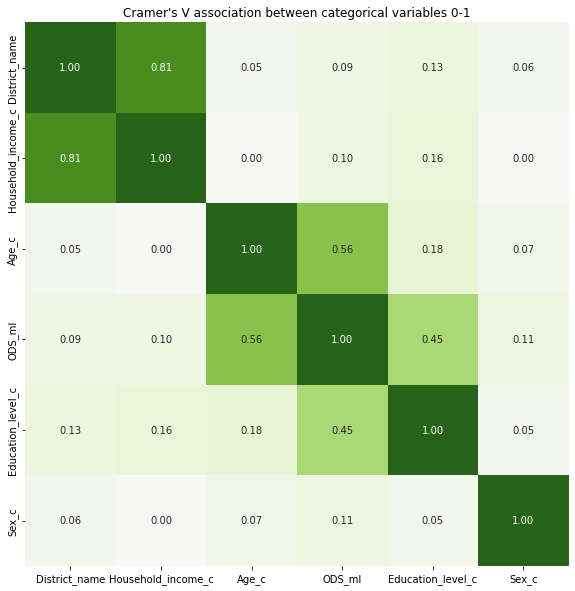

{'corr':                     District_name  Household_income_c     Age_c    ODS_ml  \
 District_name            1.000000            0.813025  0.054177  0.088405   
 Household_income_c       0.813025            1.000000  0.000000  0.101430   
 Age_c                    0.054177            0.000000  1.000000  0.563475   
 ODS_ml                   0.088405            0.101430  0.563475  1.000000   
 Education_level_c        0.134868            0.161561  0.178169  0.446460   
 Sex_c                    0.057758            0.000000  0.068010  0.113208   
 
                     Education_level_c     Sex_c  
 District_name                0.134868  0.057758  
 Household_income_c           0.161561  0.000000  
 Age_c                        0.178169  0.068010  
 ODS_ml                       0.446460  0.113208  
 Education_level_c            1.000000  0.047495  
 Sex_c                        0.047495  1.000000  ,
 'ax': <AxesSubplot:title={'center':"Cramer's V association between categorical variab

In [97]:
associations(df_3, nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson',  nan_strategy='replace', nan_replace_value=99, ax=None, figsize=(10,10), annot=True, fmt='.2f', cmap="PiYG", sv_color='silver', cbar=False, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=True, title="Cramer's V association between categorical variables 0-1", filename=None)

## Theil's U: 
We want to know if there's a certain feature that maximizes the information about our Digital skill index. For this, we will use Theil's U, also known as the Uncertainty Coefficient.This coefficient provides a value in the range of [0,1], where 0 means that feature y provides no information about feature x, and 1 means that feature y provides full information abpout features x's value.

In [98]:
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x
    
    
#Theil's U, also known as the Uncertainty Coefficient. 
#Formaly marked as U(x|y), this coefficient provides a value in the range of [0,1],
#where 0 means that feature y provides no information about feature x, and 1 means that feature y provides full information about features x's value

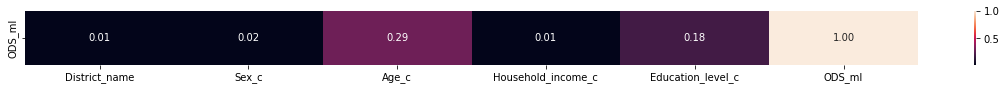

In [99]:
import scipy.stats as ss


theilu = pd.DataFrame(index=['ODS_ml'],columns=df_3.columns)
columns = df_3.columns
for j in range(0,len(columns)):
    u = theil_u(df_3['ODS_ml'].tolist(),df_3[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()

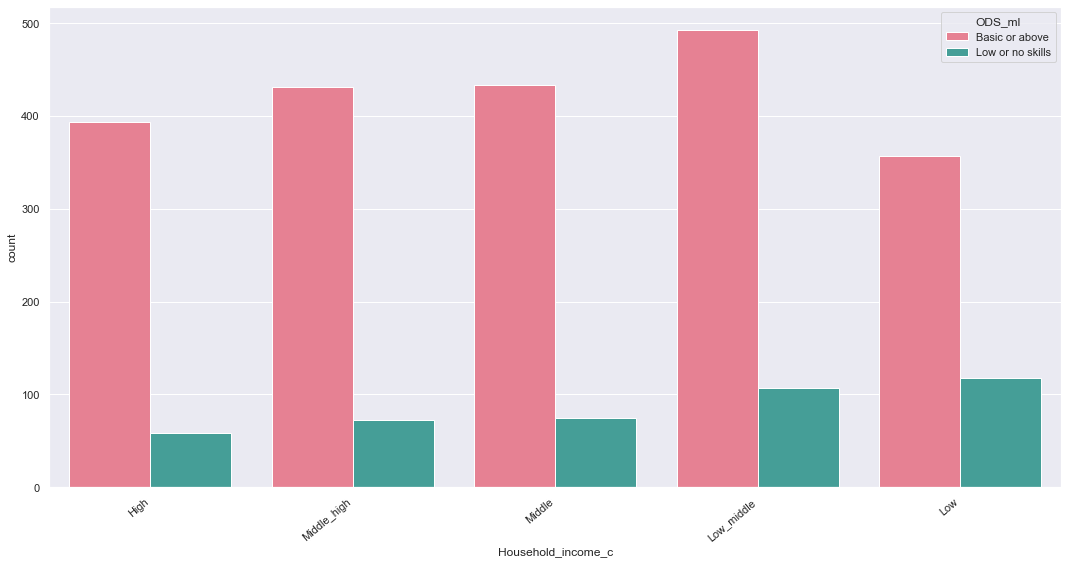

In [90]:
sns.set(rc={'figure.figsize':(15,8)})
order = pd.crosstab(df_3.Household_income_c, df_3.ODS_ml).sort_values('Low or no skills', ascending=True).index

ax=sns.countplot(x='Household_income_c',hue='ODS_ml',data=df_2, order=order,palette="husl")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


plt.tight_layout()
plt.show()

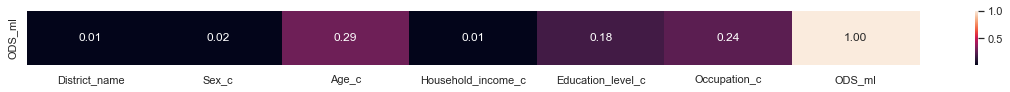

In [95]:
theilu = pd.DataFrame(index=['ODS_ml'],columns=df_5.columns)
columns = df_5.columns
for j in range(0,len(columns)):
    u = theil_u(df_5['ODS_ml'].tolist(),df_5[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()


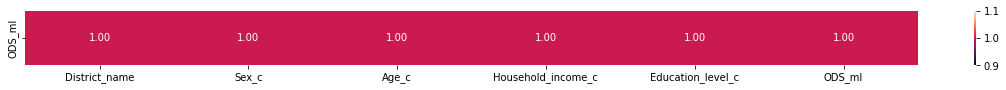

In [100]:
low = df_5[df_3['ODS_ml'].isin(['Low'])]
for j in range(0,len(columns)):
    u = theil_u(low['ODS_ml'].tolist(),low[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()

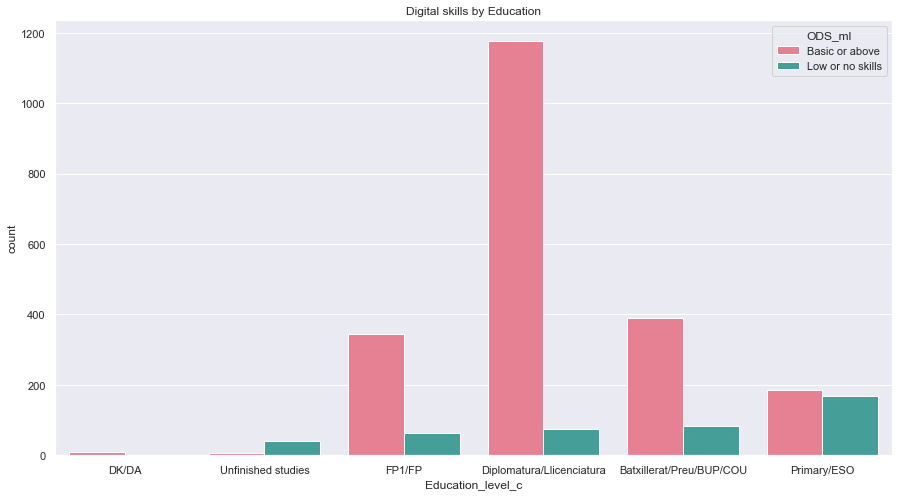

In [97]:
sns.set(rc={'figure.figsize':(15,8)})
order = pd.crosstab(df_3.Education_level_c, df_3.ODS_ml).sort_values('Low or no skills', ascending=True).index

ax=sns.countplot(x='Education_level_c',hue='ODS_ml',data=df_2, order=order,palette="husl")

plt.title("Digital skills by Education")
plt.show()

In [98]:
new_df = df_2.groupby("Household_income_c")["ODS_ml"].value_counts(normalize=True)*100
new_df = new_df.rename('Percent').reset_index()
new_df



,Household_income_c,ODS_ml,Percent
0,High,Basic or above,86.975717
1,High,Low or no skills,13.024283
2,Low,Basic or above,75.157895
3,Low,Low or no skills,24.842105
4,Low_middle,Basic or above,82.166667
5,Low_middle,Low or no skills,17.833333
6,Middle,Basic or above,85.236220
7,Middle,Low or no skills,14.763780
8,Middle_high,Basic or above,85.515873
9,Middle_high,Low or no skills,14.484127


In [102]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
#from matplotlib import rcParams
#rcParams['font.family'] = 'monospace'
#rcParams['font.sans-serif'] = ['Verdana']
import matplotlib.pyplot as plt
props = lambda key: {'color': 'salmon' if 'Women' in key else 'lightgrey'}


Text(0.5, 1.0, 'Digital skills by Gender')

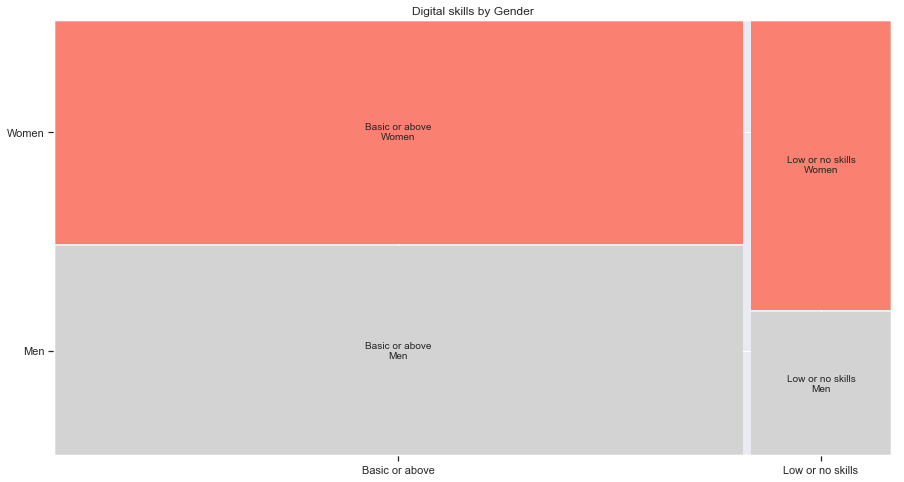

In [104]:
mosaic(df_2, ['ODS_ml', 'Sex_c'],properties=props, gap=0.01)
plt.title("Digital skills by Gender")

In [105]:
crosstable=pd.crosstab(df_2['Household_income_c'],df_2['ODS_ml'])
crosstable

ODS_ml,Basic or above,Low or no skills
Household_income_c,,
High,394,59
Low,357,118
Low_middle,493,107
Middle,433,75
Middle_high,431,73


In [ ]:
fig, ax = plt.subplots(2,1,figsize=(16, 10))

# type 1 : use hue parameter
sns.countplot(x='ODS_ml', data=df_5, hue='Occupation_c', palette='Set1', alpha=0.7, ax=ax[0])
plt.legend()
plt.xticks(rotation='vertical')

#type 2: use value_counts + barplot / hard to divide like hue 
sns.barplot(x=df_5['ODS_ml'].value_counts().index, y=df_5['ODS_ml'].value_counts(), ax=ax[1])


plt.xticks(rotation='vertical')
plt.show()

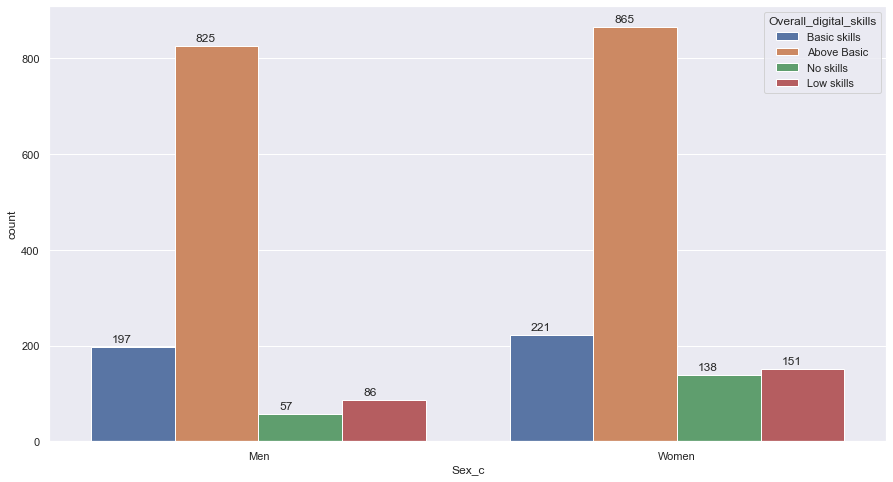

In [109]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='Sex_c',hue='Overall_digital_skills',data=df_2)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

#We can tell if someone has  basic or above digital skills by looking at problem solving columns
#What about our more specific overall digital skills indicator?


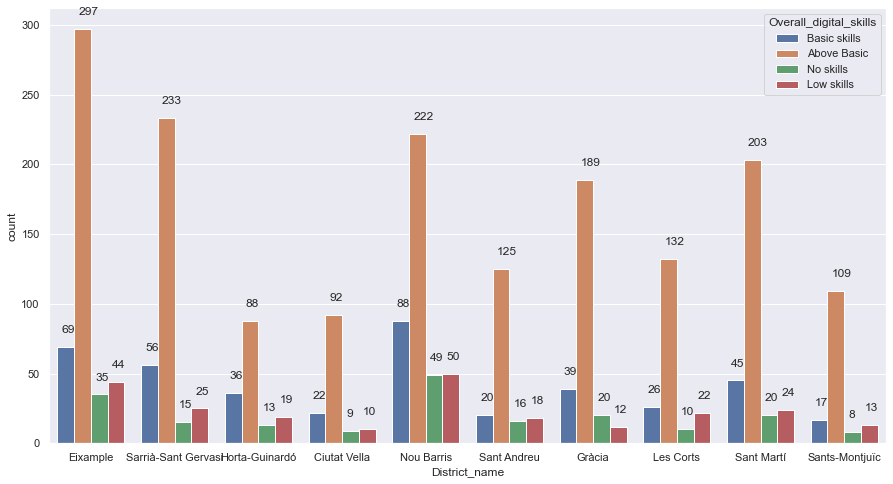

In [110]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='District_name',hue='Overall_digital_skills',data=df_3)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='Age_c',hue='Overall_digital_skills',data=df_3)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='Occupation_c',hue='Overall_digital_skills',data=df_3)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='Education_level_c',hue='Overall_digital_skills',data=df_3)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

In [ ]:
df_2

In [ ]:
low_s = df_2[df_2['ODS_ml'].isin(['Low'])]
for j in range(0,len(columns)):
    u = theil_u(low_s['ODS_ml'].tolist(),low_s[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()

In [ ]:
#However low skill are associated with all out sociodemographic variables

In [ ]:
low_skills = df_3[df_3['Overall_digital_skills'].isin(['Above'])]
(len(df_3.index) - len(low_skills.index)) / len(df_3.index) #We can determine 100% of Above skills

In [ ]:
above_skills = theilu[theilu['Overall_digital_skills'].isin(['Low'])]
(len(df_3.index) - len(theilu.index)) / len(df_3.index) #We can determine 100% of low skills

In [ ]:
df_5.Sex_c.value_counts(normalize=True)


## CART and C4.5 algorithm with chefboost

In [ ]:
#!pip install chefboost


In [129]:
from chefboost import Chefboost as chef
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# ID3 with district

In [144]:
X = df_4
X = X.rename(columns={"ODS_ml": "Decision"})

In [146]:
X_train, X_test = train_test_split(X, test_size=0.33, random_state=42, stratify=X["Decision"])

In [147]:
config = {'algorithm': 'ID3'}
modelid3 = chef.fit(X_train, config = config)

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  61.43078875541687  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  94.59141681363903 % on  1701  instances
Labels:  ['Basic or above' 'Low or no skills']
Confusion matrix:  [[1370, 50], [42, 239]]
Precision:  96.4789 %, Recall:  97.0255 %, F1:  96.7514 %


In [148]:
evaluation = chef.evaluate(modelid3, X_test, task="test")

-------------------------
Evaluate  test set
-------------------------
Accuracy:  85.45887961859357 % on  839  instances
Labels:  ['Basic or above' 'Low or no skills']
Confusion matrix:  [[632, 58], [64, 85]]
Precision:  91.5942 %, Recall:  90.8046 %, F1:  91.1977 %


Decision rule:  outputs/rules/rules.py


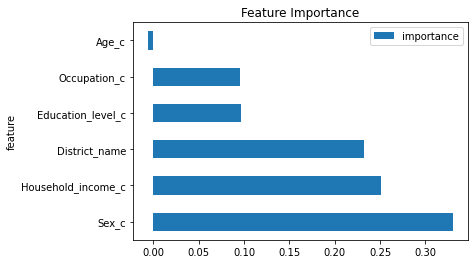

In [149]:
rules1 = "outputs/rules/rules.py"
fi = chef.feature_importance(rules1).set_index("feature")
fi.plot(kind="barh", title="Feature Importance");

# CART

In [152]:
configcart = {'algorithm': 'CART'}
modelcart = chef.fit(X_train, config = configcart)

[INFO]:  4 CPU cores will be allocated in parallel running
CART  tree is going to be built...
-------------------------
finished in  60.22173619270325  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  94.59141681363903 % on  1701  instances
Labels:  ['Basic or above' 'Low or no skills']
Confusion matrix:  [[1370, 50], [42, 239]]
Precision:  96.4789 %, Recall:  97.0255 %, F1:  96.7514 %


In [154]:
evaluation = chef.evaluate(modelcart, X_test, task="test")

['District_name', 'Sex_c', 'Age_c', 'Household_income_c', 'Education_level_c', 'Occupation_c', 'Prediction', 'Decision']
-------------------------
Evaluate  test set
-------------------------
Accuracy:  85.81644815256257 % on  839  instances
Labels:  ['Basic or above' 'Low or no skills']
Confusion matrix:  [[636, 59], [60, 84]]
Precision:  91.5108 %, Recall:  91.3793 %, F1:  91.445 %


Decision rule:  outputs/rules/rules.py


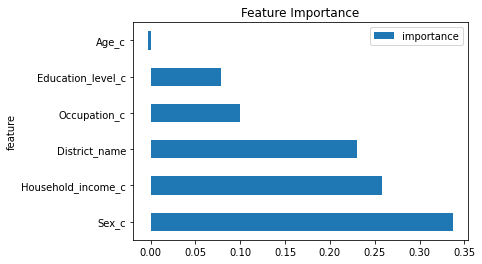

In [155]:
rules1 = "outputs/rules/rules.py"
fi = chef.feature_importance(rules1).set_index("feature")
fi.plot(kind="barh", title="Feature Importance");

# C4.5

In [156]:
configc45 = {'algorithm': 'C4.5'}
modelc45 = chef.fit(X_train, config = configc45)

[INFO]:  4 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  46.00659799575806  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  94.59141681363903 % on  1701  instances
Labels:  ['Basic or above' 'Low or no skills']
Confusion matrix:  [[1370, 50], [42, 239]]
Precision:  96.4789 %, Recall:  97.0255 %, F1:  96.7514 %


In [157]:
evaluation = chef.evaluate(modelc45, X_test, task="test")

['District_name', 'Sex_c', 'Age_c', 'Household_income_c', 'Education_level_c', 'Occupation_c', 'Prediction', 'Decision']
-------------------------
Evaluate  test set
-------------------------
Accuracy:  84.86293206197854 % on  839  instances
Labels:  ['Basic or above' 'Low or no skills']
Confusion matrix:  [[629, 60], [67, 83]]
Precision:  91.2917 %, Recall:  90.3736 %, F1:  90.8303 %


Decision rule:  outputs/rules/rules.py


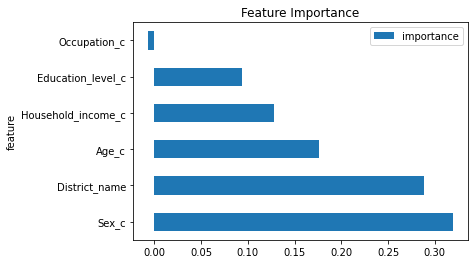

In [158]:
rules1 = "outputs/rules/rules.py"
fi = chef.feature_importance(rules1).set_index("feature")
fi.plot(kind="barh", title="Feature Importance");

# Without district

In [159]:
X = df_3
X = X.rename(columns={"ODS_ml": "Decision"})

In [160]:
X_train, X_test = train_test_split(X, test_size=0.33, random_state=42, stratify=X["Decision"])


In [161]:
config = {'algorithm': 'ID3'}
modelid3 = chef.fit(X_train, config = config)

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  45.12852096557617  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  92.53380364491476 % on  1701  instances
Labels:  ['Basic or above' 'Low or no skills']
Confusion matrix:  [[1357, 72], [55, 217]]
Precision:  94.9615 %, Recall:  96.1048 %, F1:  95.5297 %


In [133]:
prediction1 = chef.predict(modelid3, X_test.iloc[0])
prediction1

'Basic or above'

In [134]:
X_test.iloc[0]

Education_level_c             FP1/FP
Sex_c                            Men
Age_c                          25-34
Household_income_c               Low
Occupation_c                Employed
Decision              Basic or above
Name: 1914, dtype: object

In [162]:
evaluation = chef.evaluate(modelid3, X_test, task="test")


-------------------------
Evaluate  test set
-------------------------
Accuracy:  84.86293206197854 % on  839  instances
Labels:  ['Basic or above' 'Low or no skills']
Confusion matrix:  [[632, 63], [64, 80]]
Precision:  90.9353 %, Recall:  90.8046 %, F1:  90.8699 %


Decision rule:  outputs/rules/rules.py


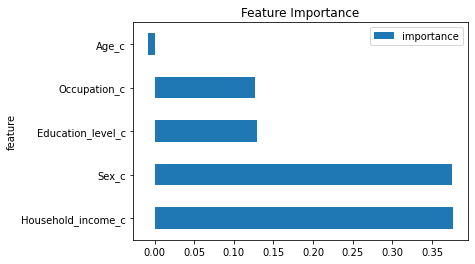

In [163]:
rules1 = "outputs/rules/rules.py"
fi = chef.feature_importance(rules1).set_index("feature")
fi.plot(kind="barh", title="Feature Importance");

# cart

In [167]:
configcart = {'algorithm': 'CART'}
modelcart = chef.fit(X_train, config = configcart)

[INFO]:  4 CPU cores will be allocated in parallel running
CART  tree is going to be built...
-------------------------
finished in  44.100794076919556  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  92.53380364491476 % on  1701  instances
Labels:  ['Basic or above' 'Low or no skills']
Confusion matrix:  [[1357, 72], [55, 217]]
Precision:  94.9615 %, Recall:  96.1048 %, F1:  95.5297 %


In [170]:
evaluationcart = chef.evaluate(modelcart, X_test, task="test")



['Education_level_c', 'Sex_c', 'Age_c', 'Household_income_c', 'Occupation_c', 'Prediction', 'Decision']
-------------------------
Evaluate  test set
-------------------------
Accuracy:  84.86293206197854 % on  839  instances
Labels:  ['Basic or above' 'Low or no skills']
Confusion matrix:  [[632, 63], [64, 80]]
Precision:  90.9353 %, Recall:  90.8046 %, F1:  90.8699 %


Decision rule:  outputs/rules/rules.py


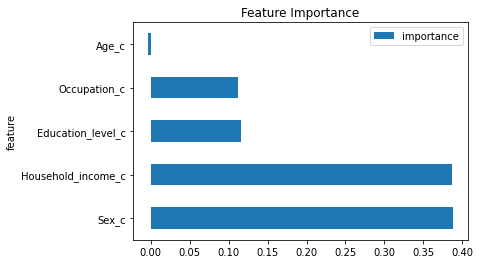

In [171]:
rules1 = "outputs/rules/rules.py"
fi = chef.feature_importance(rules1).set_index("feature")
fi.plot(kind="barh", title="Feature Importance");

# C.4

In [172]:
configC4 = {'algorithm': 'C4.5'}
modelC4 = chef.fit(X_train, config = configC4)

[INFO]:  4 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  36.72475004196167  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  92.53380364491476 % on  1701  instances
Labels:  ['Basic or above' 'Low or no skills']
Confusion matrix:  [[1357, 72], [55, 217]]
Precision:  94.9615 %, Recall:  96.1048 %, F1:  95.5297 %


In [173]:
evaluationC4 = chef.evaluate(modelC4, X_test, task="test")

['Education_level_c', 'Sex_c', 'Age_c', 'Household_income_c', 'Occupation_c', 'Prediction', 'Decision']
-------------------------
Evaluate  test set
-------------------------
Accuracy:  84.50536352800954 % on  839  instances
Labels:  ['Basic or above' 'Low or no skills']
Confusion matrix:  [[628, 62], [68, 81]]
Precision:  91.0145 %, Recall:  90.2299 %, F1:  90.6205 %


Decision rule:  outputs/rules/rules.py


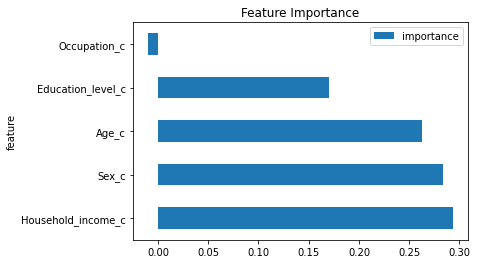

In [174]:
rules = "outputs/rules/rules.py"
fi = chef.feature_importance(rules).set_index("feature")
fi.plot(kind="barh", title="Feature Importance");

In [124]:
predictionC4 = chef.predict(modelC4, X_test.iloc[55])
predictionC4


'Low or no skills'

In [125]:
X_test.iloc[123]

District_name                         Les Corts
Sex_c                                       Men
Age_c                                     45-54
Household_income_c                         High
Education_level_c     Diplomatura/Llicenciatura
Occupation_c                 Retired/Pensionist
Decision                         Basic or above
Prediction                       Basic or above
Name: 1735, dtype: object

In [126]:
predictionC4_2 = chef.predict(modelC4, X_test.iloc[123])
predictionC4_2

'Basic or above'

In [127]:
X_test.iloc[123]

District_name                         Les Corts
Sex_c                                       Men
Age_c                                     45-54
Household_income_c                         High
Education_level_c     Diplomatura/Llicenciatura
Occupation_c                 Retired/Pensionist
Decision                         Basic or above
Prediction                       Basic or above
Name: 1735, dtype: object

In [128]:
X_test.loc[X_test['Sex_c'] =="Women"]


,District_name,Sex_c,Age_c,Household_income_c,Education_level_c,Occupation_c,Decision,Prediction
829,Sant Martí,Women,55-64,Middle_high,Batxillerat/Preu/BUP/COU,Retired/Pensionist,Basic or above,Low or no skills
1776,Sarrià-Sant Gervasi,Women,45-54,High,Diplomatura/Llicenciatura,Employed,Basic or above,Basic or above
2424,Gràcia,Women,35-44,Middle_high,Diplomatura/Llicenciatura,Employed,Basic or above,Basic or above
1259,Sarrià-Sant Gervasi,Women,75+,High,Diplomatura/Llicenciatura,Retired/Pensionist,Low or no skills,Low or no skills
257,Sant Andreu,Women,45-54,Low_middle,Primary/ESO,Unemployed,Basic or above,Basic or above
...,...,...,...,...,...,...,...,...
2477,Ciutat Vella,Women,25-34,Middle,Diplomatura/Llicenciatura,Employed,Basic or above,Basic or above
1420,Nou Barris,Women,35-44,Low,Diplomatura/Llicenciatura,Employed,Low or no skills,Basic or above
1693,Les Corts,Women,16-24,Middle_high,Batxillerat/Preu/BUP/COU,Student,Basic or above,Basic or above
1358,Gràcia,Women,35-44,Middle,Diplomatura/Llicenciatura,Employed,Basic or above,Basic or above


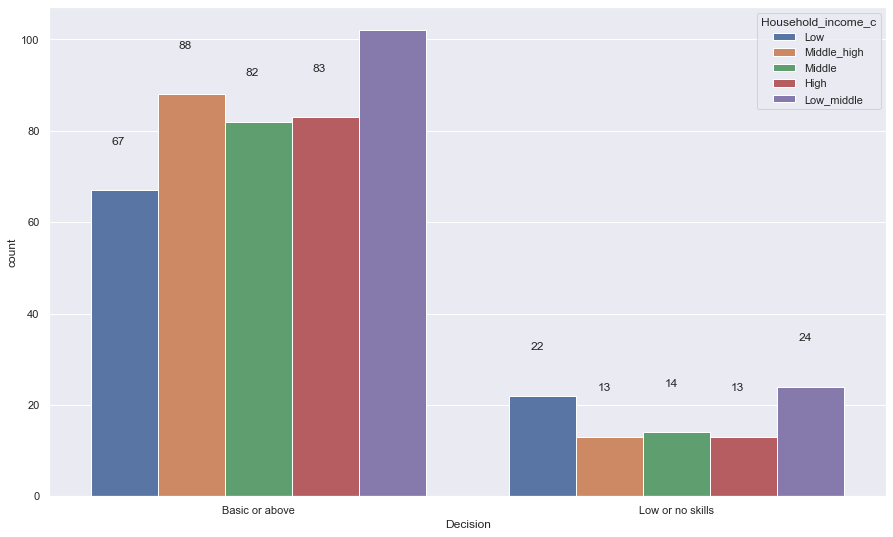

In [129]:
sns.set(rc={'figure.figsize':(15,9)})
ax=sns.countplot(x='Decision',hue='Household_income_c',data=X_test)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

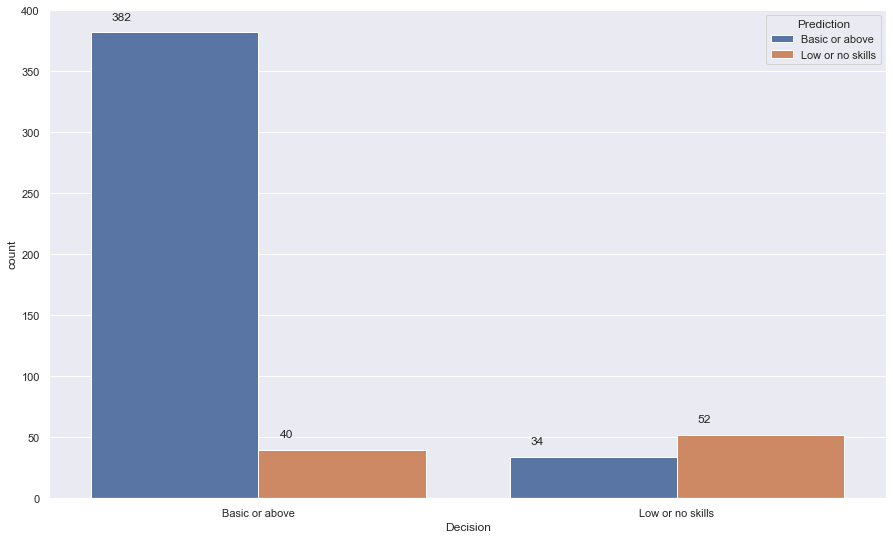

In [132]:
sns.set(rc={'figure.figsize':(15,9)})
ax=sns.countplot(x='Decision',hue='Prediction',data=X_test)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

## Catboost

In [ ]:
#!pip install catboost
from catboost import CatBoostClassifier, Pool


In [ ]:
X = df_5.drop(columns=["ODS_ml"])
y= df_5["ODS_ml"]

In [ ]:
model = CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy')

In [ ]:
model_cb = CatBoostClassifier()
model_cb.fit(X_train, y_train, plot=True, eval_set=(X_test, y_test))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=1)

pool_train = Pool(X_train, y_train,
                  cat_features = ['District_name', 'Sex_c', 'Age_c',
       'Household_income_c', 'Education_level_c', 'Occupation_c'])

In [ ]:
pool_test = Pool(X_test, cat_features =['District_name', 'Sex_c', 'Age_c',
       'Household_income_c', 'Education_level_c', 'Occupation_c'])

In [ ]:
grid = {'learning_rate': [0.03, 0.1],
'depth': [4, 6, 10],
'l2_leaf_reg': [1, 3, 5,],
'iterations': [50, 100, 150]}

In [ ]:
model.grid_search(grid,pool_train)

In [ ]:
model.get_params()

In [ ]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

In [ ]:
df_5

# pd.factorized sklearn tree

In [49]:
df_7 = df_5.apply(lambda x: pd.factorize(x)[0])


In [50]:

X = df_7.drop(['ODS_ml'],axis=1)
y = df_7['ODS_ml'].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)



In [135]:
# instantiate the DecisionTreeClassifier model

clf_dt = DecisionTreeClassifier(class_weight='balanced',max_depth = 3,random_state = 42)

# fit the model
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)

In [136]:
y_pred_dt = clf_dt.predict(X_test)
y_pred_dt[:20]

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [137]:
y_pred_train_dt = clf_dt.predict(X_train)

y_pred_train_dt

array([0, 0, 0, ..., 1, 1, 0])

In [138]:
# Execute this line (of course, modifying the path)
import sys
sys.path.insert(0, '/Users/hayre/Desktop/Ana Data Science/_functions_')

from fx_MLClassification import *

In [139]:
dt_raw = C_Allmetrics(clf_dt, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[903 162]
 [ 54 151]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[861 182]
 [ 48 179]]
 Classification report 
    precision    recall  f1-score  support
0   0.947195  0.825503  0.882172   1043.0
1   0.495845  0.788546  0.608844    227.0

++++++++ CLASSIFICATION: Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.795276    0.69001  0.777508  0.704872
test   0.818898    0.72152  0.807025  0.745508


In [142]:
from sklearn import tree


In [ ]:
fig = plt.figure(figsize=(20,20))

from sklearn import tree

tree.plot_tree(clf_dt, feature_names = X_train.columns, 
             filled=True);

In [149]:
para_grid = {'splitter': ['best', 'random'],
    'min_samples_split' : range(10,500,20), 
    'max_depth': range(1,18,2)}

print(para_grid)

{'splitter': ['best', 'random'], 'min_samples_split': range(10, 500, 20), 'max_depth': range(1, 18, 2)}


In [150]:
clf_tree = DecisionTreeClassifier(class_weight='balanced',random_state=42)

In [151]:
clf = GridSearchCV(clf_tree,
                   para_grid,
                   scoring='f1',
                   cv=5,
                   n_jobs=-1)

clf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 18, 2),
                         'min_samples_split': range(10, 500, 20),
                         'splitter': ['best', 'random']},
             scoring='f1')

In [152]:
best_parameters = clf.best_params_

print('The best parameters that fit your data are:\n', best_parameters)

The best parameters that fit your data are:
 {'max_depth': 3, 'min_samples_split': 10, 'splitter': 'best'}


In [153]:
dtree = DecisionTreeClassifier(max_depth= 3, min_samples_split= 190, 
                               splitter= 'best')

dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=190)

In [154]:
dt_opt = C_Allmetrics(dtree, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[1031   34]
 [ 122   83]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[1000   43]
 [ 132   95]]
 Classification report 
    precision    recall  f1-score  support
0   0.883392  0.958773  0.919540   1043.0
1   0.688406  0.418502  0.520548    227.0

++++++++ CLASSIFICATION: Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.877165   0.802667  0.686409  0.720061
test   0.862205   0.785899  0.688637  0.720044


In [ ]:
dt_opt

In [ ]:
fig = plt.figure(figsize=(20,20))


tree.plot_tree(dtree, feature_names = X_train.columns, 
             filled=True);

# PCA

In [51]:
from sklearn.decomposition import PCA

# Instantiate the model
pca = PCA(n_components=3)

# Fit the model with the scaled data
pca.fit(df_7)

PCA(n_components=3)

In [52]:
x_pca = pca.transform(df_7)

In [53]:
x_pca = pd.DataFrame(x_pca, columns = ['PC1', 'PC2', 'PC3'])



In [54]:
pca.explained_variance_ratio_ #third component explains 98 percent of variance

array([0.56163586, 0.22567205, 0.07909443])

In [55]:
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
# number of components
n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df_importantFeatures = pd.DataFrame(dic.items())

In [56]:
df_importantFeatures

,0,1
0,PC0,District_name
1,PC1,Age_c
2,PC2,Household_income_c


In [161]:
pca_comp=abs(pca.components_)
for pc in pca_comp:
  importantFeatures=zip(X.columns,pc)
  data=list(importantFeatures)
  sorted_by_second = sorted(data, key=lambda tup: tup[1], reverse=True)
  print(sorted_by_second)   

[('District_name', 0.9581832284586189), ('Household_income_c', 0.283383730669816), ('Age_c', 0.030611794579954804), ('Education_level_c', 0.018583507172084197), ('Occupation_c', 0.017069338450956734), ('Sex_c', 0.0016599238952493267)]
[('Age_c', 0.9948437736572646), ('Education_level_c', 0.07651439620136899), ('District_name', 0.024032503832702085), ('Household_income_c', 0.021924050867414432), ('Sex_c', 0.015757840105696773), ('Occupation_c', 0.006055454450604318)]
[('Household_income_c', 0.9479543606490021), ('District_name', 0.28097538784164927), ('Occupation_c', 0.10834689502585487), ('Education_level_c', 0.09485235453226665), ('Age_c', 0.023994930968690008), ('Sex_c', 0.005976849810802598)]


In [162]:
df_8 = df_7[["District_name","Household_income_c","Age_c","ODS_ml"]]

In [163]:
X = df_8.drop(['ODS_ml'], axis=1)

y = df_8.ODS_ml

In [164]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.33, 
                                                    random_state = 42)

In [165]:
# instantiate the DecisionTreeClassifier model

dt_pca = DecisionTreeClassifier(class_weight="balanced",random_state = 42)

# fit the model
dt_pca.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [166]:
y_pred_dt = dt_pca.predict(X_test)

y_pred_train_dt = dt_pca.predict(X_train)



In [167]:
pca_raw= C_Allmetrics(dt_pca, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[1143  272]
 [  55  231]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[557 136]
 [ 30 116]]
 Classification report 
    precision    recall  f1-score  support
0   0.948893  0.803752  0.870313    693.0
1   0.460317  0.794521  0.582915    146.0

++++++++ CLASSIFICATION: Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.786023   0.681168  0.768117  0.699022
test   0.802145   0.704605  0.799136  0.726614


In [168]:
dt_raw

,Accuracy,Precision,Recall,f1
Train,0.795276,0.69001,0.777508,0.704872
test,0.818898,0.72152,0.807025,0.745508


In [169]:
fig = plt.figure(figsize=(150,150))

from sklearn import tree

tree.plot_tree(dt_pca, feature_names = X_train.columns, 
             filled=True);
fig.savefig("decistion_tree.png")

KeyboardInterrupt: 

In [175]:
para_grid = {'splitter': ['best', 'random'],
    'min_samples_split' : range(10,500,20), 
    'max_depth': range(1,18,2)}

print(para_grid)

{'splitter': ['best', 'random'], 'min_samples_split': range(10, 500, 20), 'max_depth': range(1, 18, 2)}


In [176]:
clf_pca = DecisionTreeClassifier(class_weight='balanced',random_state=42)

In [177]:
clf = GridSearchCV(clf_pca,
                   para_grid,
                   scoring='f1',
                   cv=5,
                   n_jobs=-1)

clf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 18, 2),
                         'min_samples_split': range(10, 500, 20),
                         'splitter': ['best', 'random']},
             scoring='f1')

In [178]:
best_parameters = clf.best_params_

print('The best parameters that fit your data are:\n', best_parameters)

The best parameters that fit your data are:
 {'max_depth': 5, 'min_samples_split': 110, 'splitter': 'random'}


In [179]:
dtreepca = DecisionTreeClassifier(class_weight="balanced",max_depth= 5, min_samples_split= 110, 
                               splitter= 'random')

dtreepca.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=110, splitter='random')

In [180]:
dt_pcaa = C_Allmetrics(dtreepca, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[1093  322]
 [  58  228]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[532 161]
 [ 29 117]]
 Classification report 
    precision    recall  f1-score  support
0   0.948307  0.767677  0.848485    693.0
1   0.420863  0.801370  0.551887    146.0

++++++++ CLASSIFICATION: Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.789539   0.687679  0.776077  0.703106
test   0.773540   0.684585  0.784523  0.700186


In [181]:
dt_raw

,Accuracy,Precision,Recall,f1
Train,0.795276,0.69001,0.777508,0.704872
test,0.818898,0.72152,0.807025,0.745508


In [ ]:
fig = plt.figure(figsize=(100,100))

from sklearn import tree

tree.plot_tree(dtreepca, feature_names = X_train.columns, 
             filled=True);

# Encode with label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_5.columns

In [ ]:
district_name age nacionality 

In [ ]:
lb_make = LabelEncoder() 
lb_make

In [ ]:
df_5["District_name"] =lb_make.fit_transform(df_5['District_name'])


In [ ]:
df_5["Sex_c"] =lb_make.fit_transform(df_5['Sex_c'])

df_5["Age_c"] =lb_make.fit_transform(df_5['Age_c'])
df_5["Household_income_c"] =lb_make.fit_transform(df_5['Household_income_c'])
df_5["Education_level_c"] =lb_make.fit_transform(df_5['Education_level_c'])
df_5["Occupation_c"] =lb_make.fit_transform(df_5['Occupation_c'])
df_5["ODS_ml"] =lb_make.fit_transform(df_5['ODS_ml'])

df_5

In [ ]:
X = df_5.drop(['ODS_ml'], axis=1)

y = df_5['ODS_ml']

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.33, 
                                                    random_state = 42)

In [ ]:
# instantiate the DecisionTreeClassifier model

dt_le = DecisionTreeClassifier(class_weight='balanced',random_state = 42)

# fit the model
dt_le.fit(X_train, y_train)

In [ ]:
y_pred_dt = clf_dt.predict(X_test)

In [ ]:
y_pred_train_dt = clf_dt.predict(X_train)



In [ ]:
Metric_dt_le =C_Allmetrics(dt_le, X_train, y_train, X_test, y_test)

In [ ]:
fig = plt.figure(figsize=(100,100))

from sklearn import tree

tree.plot_tree(dt_le, feature_names = X_train.columns, 
             filled=True);

In [ ]:
para_grid = {'splitter': ['best', 'random'],
    'min_samples_split' : range(10,500,20), 
    'max_depth': range(1,20,2)}

print(para_grid)

In [ ]:
clf_t = DecisionTreeClassifier(class_weight='balanced',random_state=42)

In [ ]:
clf = GridSearchCV(clf_t,
                   para_grid,
                   scoring='f1',
                   cv=5, #how many folds
                   n_jobs=-1)

clf.fit(X_train,y_train)

In [ ]:
best_parameters = clf.best_params_
clf.best_params_

In [ ]:
DT = DecisionTreeClassifier(class_weight='balanced',max_depth= 7, min_samples_split= 90, 
                               splitter= 'random')

DT.fit(X_train,y_train)

In [ ]:
dt_opti = C_Allmetrics(DT, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(20,20))
tree.plot_tree(DT, feature_names = X_train.columns, 
             filled=True);

# Now machine learning but with ODS_low

In [ ]:
df_8 = df_4.apply(lambda x: pd.factorize(x)[0])
df_4

In [ ]:
X = df_8.drop(['ODS_low'],axis=1)
y = df_8['ODS_low'].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)




In [ ]:
# instantiate the DecisionTreeClassifier model

clf_dt = DecisionTreeClassifier(class_weight='balanced',random_state = 42)

# fit the model
clf_dt.fit(X_train, y_train)

In [ ]:
y_pred_dt = clf_dt.predict(X_test)
y_pred_train_dt = clf_dt.predict(X_train)



In [ ]:
raw =C_Allmetrics(clf_dt, X_train, y_train, X_test, y_test)

In [ ]:
para_grid = {'splitter': ['best', 'random'],
    'min_samples_split' : range(10,500,20), 
    'max_depth': range(1,20,2)}

print(para_grid)

In [ ]:
clf_tree = DecisionTreeClassifier(class_weight='balanced',random_state=42)

In [ ]:
clf = GridSearchCV(clf_tree,
                   para_grid,
                   scoring='accuracy',
                   cv=5, #how many folds
                   n_jobs=-1)

clf.fit(X_train,y_train)

In [ ]:
best_parameters = clf.best_params_

print('The best parameters that fit your data are:\n', best_parameters)

In [ ]:
dtree = DecisionTreeClassifier(class_weight="balanced",max_depth= 3, min_samples_split= 170, 
                               splitter= 'best')

dtree.fit(X_train,y_train)

In [ ]:
dt_opt = C_Allmetrics(dtree, X_train, y_train, X_test, y_test)

# MAPS

In [ ]:
import folium

import xlrd

import json
import folium.plugins

In [ ]:
0.278195+0.255639+0.165414+0.090226+0.082702+0.075188+0.052632

In [ ]:
pd.set_option('display.max_rows', 134)


df_2.groupby("District_name")["Age_c"].apply(lambda x: x.value_counts(normalize=True).sort_values(ascending=False)).reset_index()

In [ ]:
DS

In [ ]:
df_top_ds = df_2.groupby("District_name")["ODS_ml"].apply(lambda x: x.value_counts(normalize=True).tail(1)).reset_index()
df_top_ds

In [ ]:
mask = df_3['Sex_c']=="Women" 
dfW = pd.crosstab(df_2.loc[mask, 'ODS_ml'], df_2.loc[mask, 'District_name'],normalize="index",margins=True)*100
dfW

In [ ]:
mask = df_3['Age_c']=="Men" 
df3 = pd.crosstab(df_3.loc[mask, 'ODS_ml'], df_2.loc[mask, 'District_name'],normalize="index",margins=True).round(3)*100
df3

In [ ]:
# assign data of lists.  
data = {'District_name': ["Ciutat Vella","Eixample","Gràcia","Horta-Guinardó","Les Corts","Nou Barris","Sant Andreu","Sant Martí","Sants-Montjuïc","Sarrià-Sant Gervasi"], 'ODS_ml': [2.8,16.6,8.7,8.3,8.0,23.2,6.6,10.4,5.2,10.4]}  
  
# Create DataFrame  
men = pd.DataFrame(data)  
  
# Print the output.  
men 

In [ ]:
# assign data of lists.  
data = {'District_name': ["Ciutat Vella","Eixample","Gràcia","Horta-Guinardó","Les Corts","Nou Barris","Sant Andreu","Sant Martí","Sants-Montjuïc","Sarrià-Sant Gervasi"], 'ODS_ml': [7.7,21.7,4.9,5.6,6.3,22.4,10.5,9.8,4.2,7.0]}  
  
# Create DataFrame  
women = pd.DataFrame(data)  
  
# Print the output.  
women  

In [ ]:
df_age = df_2.loc[(df_2["Age_c"] =="75+")&(df_2["ODS_ml"] =="Low or no skills")]
df_age25 = df_2.loc[(df_2["Age_c"] =="25-34")&(df_2["ODS_ml"] =="Low or no skills")]


AGE75 = df_age.groupby("District_name")["ODS_ml"].apply(lambda x: x.value_counts().head(1)).reset_index()
AGE75

In [ ]:
df_w = df_2.loc[(df_2["Sex_c"] =="Women")&(df_2["ODS_ml"] =="Low or no skills")]
df_m = df_2.loc[(df_2["Sex_c"] =="Men")&(df_2["ODS_ml"] =="Low or no skills")]


DFW = df_age.groupby("District_name")["ODS_ml"].apply(lambda x: x.value_counts().head(1)).reset_index()
df_m

In [ ]:
SS =df_2.groupby("District_name")["ODS_ml"].apply(lambda x: x.value_counts(normalize=True).tail(1)).reset_index()
SS

In [ ]:
m = folium.plugins.DualMap(location=(41.39, 2.17), zoom_start=12)
fg_both = folium.FeatureGroup(name="markers_both").add_to(m)
fg_1 = folium.FeatureGroup(name="markers_1").add_to(m.m1)
fg_2 = folium.FeatureGroup(name="markers_2").add_to(m.m2)

icon_red = folium.Icon(color="red")
folium.Marker((52.0, 5.0), tooltip="both", icon=icon_red).add_to(fg_both)
folium.Marker((52.4, 5.0), tooltip="1").add_to(fg_1)
folium.Marker((52.0, 5.4), tooltip="2").add_to(fg_2)

folium.LayerControl(collapsed=False).add_to(m)




# We add the link which contains the GeoJson file

BCNGeo = 'https://raw.githubusercontent.com/martgnz/bcn-geodata/master/districtes/districtes.geojson'

# We call folium's library to build a map

BCN_map = folium.Map(location=[41.39, 2.17], zoom_start=11) # in location we must add the city's coordinates

# Now we can build our choropleth map by calling the .choropleth method

BCN_map.choropleth(geo_data=BCNGeo, # GeoJson Coordinates
                   data=SS,   # The table which contains the values we are analysing
                   columns=['District_name', 'ODS_ml'],
                   key_on='feature.properties.NOM', # We chose the key we need in the GeoJson file
                   fill_color='YlOrRd',
                   fill_opacity=0.7,
                   line_opacity=0.4,
                   legend_name='LoW Digital skills by district')


BCN_map

# We specify a lambda function mapping a GeoJson Feature to a style dict

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}

# We specify a function mapping a GeoJson Feature to a style dict for mouse events, in this case "highlighting"

highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

# We create a new layer for the map which is going to give us the interactivity

BCNT = folium.features.GeoJson(  
    BCNGeo,
    style_function=style_function,
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['NOM'],
        aliases=['District name:'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
    )
)

BCN_map.add_child(BCNT) # We add this new layer
BCN_map.keep_in_front(BCNT) # By keeping it in front we will ensure that each time we deploy the map, this layer will be in the front
folium.LayerControl().add_to(BCN_map)

BCN_map

In [ ]:
# We add the link which contains the GeoJson file

BCNGeo = 'https://raw.githubusercontent.com/martgnz/bcn-geodata/master/districtes/districtes.geojson'

# We call folium's library to build a map

BCN_map2 = folium.Map(location=[41.39, 2.17], zoom_start=11) # in location we must add the city's coordinates

# Now we can build our choropleth map by calling the .choropleth method

BCN_map2.choropleth(geo_data=BCNGeo, # GeoJson Coordinates
                   data=df_top_ds,   # The table which contains the values we are analysing
                   columns=['District_name', 'ODS_ml'],
                   key_on='feature.properties.NOM', # We chose the key we need in the GeoJson file
                   fill_color='YlOrRd',
                   fill_opacity=0.7,
                   line_opacity=0.4,
                   legend_name='LOW Digital skills by district')


BCN_map2

# We specify a lambda function mapping a GeoJson Feature to a style dict

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}

# We specify a function mapping a GeoJson Feature to a style dict for mouse events, in this case "highlighting"

highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

# We create a new layer for the map which is going to give us the interactivity

BCNT = folium.features.GeoJson(  
    BCNGeo,
    style_function=style_function,
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['NOM',],
        aliases=['District name:'],
        style=("background-color: white; color:black; font-family: arial; font-size: 12px; padding: 10px;")
    )
)

BCN_map2.add_child(BCNT) # We add this new layer
BCN_map2.keep_in_front(BCNT) # By keeping it in front we will ensure that each time we deploy the map, this layer will be in the front
folium.LayerControl().add_to(BCN_map2)

BCN_map2

In [ ]:
# We add the link which contains the GeoJson file

BCNGeo = 'https://raw.githubusercontent.com/martgnz/bcn-geodata/master/districtes/districtes.geojson'

# We call folium's library to build a map

BCN_map3 = folium.Map(location=[41.39, 2.17], zoom_start=11) # in location we must add the city's coordinates

# Now we can build our choropleth map by calling the .choropleth method

BCN_map3.choropleth(geo_data=BCNGeo, # GeoJson Coordinates
                   data=women,   # The table which contains the values we are analysing
                   columns=['District_name', 'ODS_ml'],
                   key_on='feature.properties.NOM', # We chose the key we need in the GeoJson file
                   fill_color='YlOrRd',
                   fill_opacity=0.7,
                   line_opacity=0.4,
                   legend_name='LOW Digital skills by district')


BCN_map3

# We specify a lambda function mapping a GeoJson Feature to a style dict

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}

# We specify a function mapping a GeoJson Feature to a style dict for mouse events, in this case "highlighting"

highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

# We create a new layer for the map which is going to give us the interactivity

BCNT = folium.features.GeoJson(  
    BCNGeo,
    style_function=style_function,
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['NOM',],
        aliases=['District name:'],
        style=("background-color: white; color:black; font-family: arial; font-size: 12px; padding: 10px;")
    )
)

BCN_map3.add_child(BCNT) # We add this new layer
BCN_map3.keep_in_front(BCNT) # By keeping it in front we will ensure that each time we deploy the map, this layer will be in the front
folium.LayerControl().add_to(BCN_map3)



In [ ]:

# We add the link which contains the GeoJson file

BCNGeo = 'https://raw.githubusercontent.com/martgnz/bcn-geodata/master/districtes/districtes.geojson'

# We call folium's library to build a map

BCN_map3 = folium.Map(location=[41.39, 2.17], zoom_start=11) # in location we must add the city's coordinates

# Now we can build our choropleth map by calling the .choropleth method

BCN_map3.choropleth(geo_data=BCNGeo, # GeoJson Coordinates
                   data=women,   # The table which contains the values we are analysing
                   columns=['District_name', 'ODS_ml'],
                   key_on='feature.properties.NOM', # We chose the key we need in the GeoJson file
                   fill_color='YlOrRd',
                   fill_opacity=0.7,
                   line_opacity=0.4,
                   legend_name='Low Digital skills by district WOMEN')


BCN_map3

# We specify a lambda function mapping a GeoJson Feature to a style dict

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}

# We specify a function mapping a GeoJson Feature to a style dict for mouse events, in this case "highlighting"

highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

# We create a new layer for the map which is going to give us the interactivity

BCNT = folium.features.GeoJson(  
    BCNGeo,
    style_function=style_function,
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['NOM',],
        aliases=['District name:'],
        style=("background-color: white; color:black; font-family: arial; font-size: 13px; padding: 10px;")
    )
)

BCN_map3.add_child(BCNT) # We add this new layer
BCN_map3.keep_in_front(BCNT) # By keeping it in front we will ensure that each time we deploy the map, this layer will be in the front
folium.LayerControl().add_to(BCN_map3)

BCN_map3

In [ ]:

# We add the link which contains the GeoJson file

BCNGeo = 'https://raw.githubusercontent.com/martgnz/bcn-geodata/master/districtes/districtes.geojson'

# We call folium's library to build a map

BCN_map4 = folium.Map(location=[41.39, 2.17], zoom_start=11) # in location we must add the city's coordinates

# Now we can build our choropleth map by calling the .choropleth method

BCN_map4.choropleth(geo_data=BCNGeo, # GeoJson Coordinates
                   data=men,   # The table which contains the values we are analysing
                   columns=['District_name', 'ODS_ml'],
                   key_on='feature.properties.NOM', # We chose the key we need in the GeoJson file
                   fill_color='YlOrRd',
                   fill_opacity=0.7,
                   line_opacity=0.4,
                   legend_name='LOW Digital skills by district')


BCN_map4

# We specify a lambda function mapping a GeoJson Feature to a style dict

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}

# We specify a function mapping a GeoJson Feature to a style dict for mouse events, in this case "highlighting"

highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

# We create a new layer for the map which is going to give us the interactivity

BCNT = folium.features.GeoJson(  
    BCNGeo,
    style_function=style_function,
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['NOM',],
        aliases=['District name:'],
        style=("background-color: white; color:black; font-family: arial; font-size: 12px; padding: 10px;")
    )
)

BCN_map4.add_child(BCNT) # We add this new layer
BCN_map4.keep_in_front(BCNT) # By keeping it in front we will ensure that each time we deploy the map, this layer will be in the front
folium.LayerControl().add_to(BCN_map4)



In [ ]:
m = folium.plugins.DualMap(location=(41.39, 2.17), zoom_start=12)


folium.LayerControl(collapsed=False).add_to(m)



# Create a map object of the city of Barcelona
barcelona_map= folium.Map(location=[41.38879, 2.15899], zoom_start=12)


for lat, lng, label in zip(df_age25.Latitud, df_age25.Longitud, df_age25.ODS_ml.astype(str)):
    if label!='0':
        folium.features.CircleMarker(
            [lat, lng],
            radius=3,
            color='black',
            fill=True,
            popup=label,
            fill_color='darkred',
            fill_opacity=0.9
        ).add_to(m.m1)
    
# Create a 2 map object of the city of Barcelona
barcelona_map2= folium.Map(location=[41.38879, 2.15899], zoom_start=12)


for lat, lng, label in zip(df_age.Latitud, df_age.Longitud, df_age.ODS_ml.astype(str)):
    if label!='0':
        folium.features.CircleMarker(
            [lat, lng],
            radius=3,
            color='black',
            fill=True,
            popup=label,
            fill_color='darkred',
            fill_opacity=0.9
        ).add_to(m.m2)
        
    
    
    
    
    
# Show map
m

In [ ]:
m

In [ ]:
from IPython.core.display import display, HTML

htmlmapSEX = HTML('<iframe srcdoc="{}" style="float:left; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           '<iframe srcdoc="{}" style="float:right; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           .format(BCN_map3.get_root().render().replace('"', '&quot;'),500,500,
                   BCN_map4.get_root().render().replace('"', '&quot;'),500,500))


htmlmapSEX

In [ ]:
from IPython.core.display import display, HTML

htmlmap = HTML('<iframe srcdoc="{}" style="float:left; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           '<iframe srcdoc="{}" style="float:right; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           .format(BCN_map.get_root().render().replace('"', '&quot;'),500,500,
                   BCN_map2.get_root().render().replace('"', '&quot;'),500,500))




In [ ]:
display(htmlmap)

In [ ]:
m = folium.plugins.DualMap(location=(41.39, 2.17), zoom_start=12)


folium.LayerControl(collapsed=False).add_to(m)



# Create a map object of the city of Barcelona
barcelona_map= folium.Map(location=[41.38879, 2.15899], zoom_start=12)


for lat, lng, label in zip(df_w.Latitud, df_w.Longitud, df_w.ODS_ml.astype(str)):
    if label!='0':
        folium.features.CircleMarker(
            [lat, lng],
            radius=3,
            color='black',
            fill=True,
            popup=label,
            fill_color='darkred',
            fill_opacity=0.9
        ).add_to(m.m1)
    
# Create a 2 map object of the city of Barcelona
barcelona_map2= folium.Map(location=[41.38879, 2.15899], zoom_start=12)


for lat, lng, label in zip(df_m.Latitud, df_m.Longitud, df_m.ODS_ml.astype(str)):
    if label!='0':
        folium.features.CircleMarker(
            [lat, lng],
            radius=3,
            color='black',
            fill=True,
            popup=label,
            fill_color='darkred',
            fill_opacity=0.9
        ).add_to(m.m2)
        
    
    
    
    
    
# Show map
m #woman on the left, man on the right low skills